In [1]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional, ExternalPotential
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.optimization import Optimization


from ase.build import bulk
from ase.io.trajectory import Trajectory
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from sklearn.model_selection import train_test_split 
from sklearn.kernel_ridge import KernelRidge 
from dscribe.descriptors import CoulombMatrix, SineMatrix, EwaldSumMatrix, SOAP
from ase import Atoms
from ase.io import read

import cWT

/opt/homebrew/lib/python3.11/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


In [2]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}

In [3]:
Ks_energy = np.load('./KS_energy.npy')

Ks_Btin_TE = np.asarray(Ks_energy)[0]
Ks_fcc_TE = np.asarray(Ks_energy)[1]
Ks_bcc_TE = np.asarray(Ks_energy)[2]
Ks_8cd_TE = np.asarray(Ks_energy)[3]
Ks_7cd_TE = np.asarray(Ks_energy)[4]

In [4]:
import os
os.chdir('../../')
path_file = os.getcwd()

In [5]:
Ks_sh_TE = []
Ks_bct5_TE = []
Ks_hcp_TE = []
Ks_dhcp_TE = []
Ks_cbcc_TE = []
for i in np.arange(0,30,1):

    with open('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/ks_calculations_test_set/DATA_sh/Si_sh'+str(i)+'.out') as D:
        k = [match for match in D if "Total energy" in match]
    KS_sh = str(k).split()[6]
    Ks_sh_TE.append(float(KS_sh))
    with open('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bct5/DATA2/Si_bct5'+str(i)+'.out') as D:
        k = [match for match in D if "Total energy" in match]
    KS_bct5 = str(k).split()[6]
    Ks_bct5_TE.append(float(KS_bct5))
    with open('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/ks_calculations_test_set/DATA_hcp/Si_hcp'+str(i)+'.out') as A:
        k = [match for match in A if "Total energy" in match]
    KS_hcp = str(k).split()[6]
    Ks_hcp_TE.append(float(KS_hcp))
    with open('/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/ks_calculations_test_set/DATA_dhcp/Si_dhcp'+str(i)+'.out') as D:
        k = [match for match in D if "Total energy" in match]
    KS_dhcp = str(k).split()[6]
    Ks_dhcp_TE.append(float(KS_dhcp))

In [6]:
bct5te = [-30.96844136, -31.28541961, -31.53942605, -31.73929864,
       -31.89294616, -32.00717211, -32.08802702, -32.14145956,
       -32.17298814, -32.18722414, -32.18781084, -32.17759146,
       -32.15893266, -32.13374573, -32.10363464, -32.06986473,
       -32.03339516, -31.99498287, -31.95525182, -31.91472924,
       -31.87386129, -31.83299037, -31.79233393, -31.75198588,
       -31.71196015, -31.67225396, -31.63288697, -31.59391025,
       -31.55539707, -31.51743738]

In [7]:
Ks_bct5_TE-np.asarray(bct5te)

array([ 1.94793515e-09,  1.18450671e-09,  1.92194705e-09,  3.74408415e-09,
        6.76081413e-11, -1.85627158e-09, -4.37687220e-10, -2.77651679e-09,
        9.78026549e-10,  1.23495880e-09,  2.06375006e-09,  4.07917611e-09,
        4.05345446e-09,  1.73434955e-09,  4.03871780e-09, -1.13985266e-09,
       -2.01813322e-09, -1.86351201e-09, -2.55780463e-09, -5.23865396e-10,
       -2.01891481e-09,  3.78733844e-09, -7.86336329e-10, -3.10340198e-09,
       -2.94567215e-09,  1.34729206e-09,  1.64543579e-09,  5.24428145e-09,
        4.54800997e-09,  4.06795309e-09])

In [8]:
Ks_Btin_KE =[]
Ks_fcc_KE = []
Ks_bcc_KE = []
Ks_8cd_KE = []
Ks_sh_KE = []
Ks_bct5_KE = []
Ks_hcp_KE = []
Ks_dhcp_KE = []
for i in np.arange(0,30,1):
    with open(path_file+'/ks_calculations/Si_Btin/DATA2/Si'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_Btin = str(k).split()[6]
    Ks_Btin_KE.append(float(KS_Btin))
    with open(path_file+'/ks_calculations/Si_fcc/DATA2/Si'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_fcc = str(k).split()[6]
    Ks_fcc_KE.append(float(KS_fcc))

    with open(path_file+'/ks_calculations/Si_8cd/DATA2/Si'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_8cd = str(k).split()[6]
    Ks_8cd_KE.append(float(KS_8cd))
   
    with open(path_file+'/ks_calculations/Si_bcc/DATA2/Si'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_bcc = str(k).split()[6]
    Ks_bcc_KE.append(float(KS_bcc))
    
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_sh/Si_sh'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_sh = str(k).split()[6]
    Ks_sh_KE.append(float(KS_sh))

    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_dhcp/Si_dhcp'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_dhcp = str(k).split()[6]
    Ks_dhcp_KE.append(float(KS_dhcp))
    
    with open(path_file+'/ks_calculations/Si_bct5/DATA2/Si_bct5'+str(i)+'.out') as D:
        k = [match for match in D if "Kinetic energy" in match]
    KS_bct5 = str(k).split()[6]
    Ks_bct5_KE.append(float(KS_bct5))
    with open(path_file+'/ks_calculations/ks_calculations_test_set/DATA_hcp/Si_hcp'+str(i)+'.out') as A:
        k = [match for match in A if "Kinetic energy" in match]
    KS_hcp = str(k).split()[6]
    Ks_hcp_KE.append(float(KS_hcp))

In [9]:
r = np.linspace(0.8, 1.4, 30)

In [10]:
path_file

'/Users/valeria/Documents/aiWT/Final_version/wt/wt'

In [11]:
import h5py
file = h5py.File(path_file+"/organize_data/Data_phases.hdf5", "r")
fileX = file["Descriptor"]
rho0_KE_WT = file["rho0_KE_wt"]
rho0_TE_WT = file["rho0_TE_wt"]
rho0_DEN_WT = file["rho0_DEN_wt"]
rho0_KE_SM = file["rho0_KE_sm"]
rho0_TE_SM = file["rho0_TE_sm"]
rho0_DEN_SM = file["rho0_DEN_sm"]
Rho = file["rho"]


rho0_KE_wt =[]
rho0_TE_wt =[]
rho0_DEN_wt=[]
rho0_KE_sm =[]
rho0_TE_sm =[]
rho0_DEN_sm =[]
rho = []
for i in np.arange(0,280):
    rho0_KE_wt.append(rho0_KE_WT[i][0]) 
    rho0_TE_wt.append(rho0_TE_WT[i][0]) 
    rho0_DEN_wt.append(rho0_DEN_WT[i][0])
    rho0_KE_sm.append(rho0_KE_SM[i][0]) 
    rho0_TE_sm.append(rho0_TE_SM[i][0]) 
    rho0_DEN_sm.append(rho0_DEN_SM[i][0])
    rho.append(Rho[i][0])

In [12]:
file.close()

In [13]:
rho0_Btin_KE_wt = rho0_KE_wt[0:30]
rho0_fcc_KE_wt = rho0_KE_wt[30:60]
rho0_bcc_KE_wt = rho0_KE_wt[60:90]
rho0_cd_KE_wt = rho0_KE_wt[90:120]
rho0_dhcp_KE_wt = rho0_KE_wt[120:150]
rho0_Btin_hd_KE_wt = rho0_KE_wt[150:180]
rho0_rand4_KE_wt = rho0_KE_wt[180:185]
rho0_rand8_KE_wt = rho0_KE_wt[185:190]
rho0_bct5_KE_wt = rho0_KE_wt[190:220]
rho0_hcp_KE_wt = rho0_KE_wt[220:250]
rho0_sh_KE_wt = rho0_KE_wt[250:280]

rho0_Btin_TE_wt = rho0_TE_wt[0:30]
rho0_fcc_TE_wt = rho0_TE_wt[30:60]
rho0_bcc_TE_wt = rho0_TE_wt[60:90]
rho0_cd_TE_wt = rho0_TE_wt[90:120]
rho0_dhcp_TE_wt = rho0_TE_wt[120:150]
rho0_Btin_hd_TE_wt = rho0_TE_wt[150:180]
rho0_rand4_TE_wt = rho0_TE_wt[180:185]
rho0_rand8_TE_wt = rho0_TE_wt[185:190]
rho0_bct5_TE_wt = rho0_TE_wt[190:220]
rho0_hcp_TE_wt = rho0_TE_wt[220:250]
rho0_sh_TE_wt = rho0_TE_wt[250:280]

rho0_Btin_DEN_wt = rho0_DEN_wt[0:30]
rho0_fcc_DEN_wt = rho0_DEN_wt[30:60]
rho0_bcc_DEN_wt = rho0_DEN_wt[60:90]
rho0_cd_DEN_wt = rho0_DEN_wt[90:120]
rho0_dhcp_DEN_wt = rho0_DEN_wt[120:150]
rho0_Btin_hd_DEN_wt = rho0_DEN_wt[150:180]
rho0_rand4_DEN_wt = rho0_DEN_wt[180:185]
rho0_rand8_DEN_wt = rho0_DEN_wt[185:190]
rho0_bct5_DEN_wt = rho0_DEN_wt[190:220]
rho0_hcp_DEN_wt = rho0_DEN_wt[220:250]
rho0_sh_DEN_wt = rho0_DEN_wt[250:280]

In [14]:
rho0_bcc_KE_wt = [0.06142715, 0.07812751, 0.07379412, 0.07957158, 0.08157818,0.080981  , 0.07661705, 0.06884122, 0.06048298, 0.0533694 ,0.04798181, 0.04408248, 0.04122169, 0.03897212, 0.03706547,0.03544246, 0.03400657, 0.03271692, 0.03156342, 0.03052393,0.02957794, 0.02870672, 0.02790857, 0.02717282, 0.02648589,0.02584552, 0.02524499, 0.02468115, 0.02415205, 0.02365586]

In [15]:
rho0_fcc_TE_wt = np.load(path_file+'/ks_calculations/Si_fcc/DATA2/rho0_dTE.npy')

In [16]:
rho0_fcc_TE_wt= [0.09673084,0.09021482,0.08449455,0.07952551,0.0751474 ,0.07119835,0.06768235,0.06452084,0.06163877,0.0590039 ,0.05640183,0.05364946,0.05005879,0.04647901,0.04368379,0.04189186,0.04072559,0.03974306,0.03875802,0.0377161 ,0.03674104,0.03577425,0.03483485,0.03391843,0.03304381,0.0321998 ,0.03140109,0.03063086,0.02989303,0.02919675]

In [17]:
rho0_bct5_KE_wt = np.load("/Users/valeria/Documents/aiWT/Final_version/wt/wt/ks_calculations/Si_bct5/DATA2/rho0_dT.npy")

In [18]:
# rho0_dhcp_DEN_wt = rho_dhcp0_den #[0.03911052, 0.03620916, 0.03390274, 0.03206928, 0.03288216, 0.039, 0.036, 0.034, 0.032, 0.031, 0.025, 0.026, 0.027, 0.025,
#        0.029, 0.017, 0.015, 0.016, 0.017, 0.019, 0.020, 0.020, 0.019,
#        0.019, 0.026, 0.022, 0.026, 0.026, 0.024]

In [19]:
rho0_bct5_TE_wt = [0.06533168, 0.05630981, 0.04473504, 0.03978841, 0.03651514,
        0.03423538, 0.03246512, 0.03103024, 0.02983059, 0.02882025,
        0.02796016, 0.02722429, 0.02656433, 0.02595726, 0.02544661,
        0.02502034, 0.02466189, 0.02436471, 0.02411465, 0.02389834,
        0.02370005, 0.02352027, 0.02334777, 0.02317923, 0.02301507,
        0.02285681, 0.02270007, 0.02254006, 0.02238082, 0.02221971]

In [20]:
rho0_TE = [rho0_Btin_TE_wt, rho0_fcc_TE_wt, rho0_bcc_TE_wt, rho0_cd_TE_wt, rho0_dhcp_TE_wt, rho0_hcp_TE_wt, rho0_bct5_TE_wt, rho0_sh_TE_wt]
rho0_KE = [rho0_Btin_KE_wt, rho0_fcc_KE_wt, rho0_bcc_KE_wt, rho0_cd_KE_wt, rho0_dhcp_KE_wt, rho0_hcp_KE_wt, rho0_bct5_KE_wt, rho0_sh_KE_wt]
rho0_DEN = [rho0_Btin_DEN_wt, rho0_fcc_DEN_wt, rho0_bcc_DEN_wt, rho0_cd_DEN_wt, rho0_dhcp_DEN_wt, rho0_hcp_DEN_wt, rho0_bct5_DEN_wt, rho0_sh_DEN_wt]

In [21]:
dictionary = {
    'Si_Btin': {'file': 'Si_Btin.vasp', 'structure': '', 'lattice':[4.81,4.81,2.65, 90,90,90]}, 
    'Si_fcc': {'file': 'Si_fcc.vasp', 'structure': 'fcc', 'lattice': 3.405},
    'Si_bcc': {'file': 'Si_bcc.vasp', 'structure': 'bcc', 'lattice': None},
    'Si_8cd': {'file': 'Si_cd.vasp', 'structure': 'diamond', 'lattice':5.43},
    'Si_dhcp': {'file': 'Si_dhcp.vasp', 'structure': 'dhcp', 'lattice':None},
    'Si_bct5': {'file': 'Si_bct5.vasp', 'structure': 'bct5', 'lattice':None},
    'Si_sh': {'file': 'Si_sh.vasp', 'structure': 'sh', 'lattice':None},
    'Si_cbcc': {'file': 'Si_cbcc.vasp', 'structure': 'cbcc', 'lattice':None},
    'Si_hcp': {'file': 'Si_hcp.vasp', 'structure': 'hcp', 'lattice':None},
}

In [22]:
def get_ions(phase, r, j):
    if phase=='Si_fcc' or phase=='Si_8cd':
        print(dictionary[phase]['structure'])
        ions = Ions.from_ase(bulk('Si', str(dictionary[phase]['structure']), a= dictionary[phase]['lattice'], cubic=True))
#         print(l[i])
        cell = ions.get_cell()
        ions.set_cell(cell * r, scale_atoms=True) 
    if phase=='Si_dhcp':
        inputfile = path_file+'/Results/Structures/'+dictionary[phase]['file']
        ions = Ions.from_ase(read(inputfile, format='vasp'))
        cell = ions.get_cell()
        ions.set_cell(cell * r, scale_atoms=True) 
    if phase=='Si_bct5':
        inputfile = path_file+'/ks_calculations/Si_bct5/DATA2/Si_bct5'+str(j)+'.in'
        ions = Ions.from_ase(read(inputfile))
    if phase=='Si_bcc':
        ions = Ions.from_ase(bulk('Si', 'bcc', a= 3.09, cubic=True))
        cell = ions.get_cell()
        ions.set_cell(cell * r, scale_atoms=True) 
    else:
        inputfile = path_file+'/Results/Structures/'+dictionary[phase]['file']
        ions = Ions.from_ase(read(inputfile, format='vasp'))
        cell = ions.get_cell()
        ions.set_cell(cell * r, scale_atoms=True)
    return ions

In [23]:
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')
def get_energy(x0, ions, path_rho):

        KE = Functional(type='KEDF',name='WT', rho0=x0)
        if path_rho is None:
            nr = ecut2nr(ecut=25, lattice=ions.cell)
            grid = DirectGrid(lattice=ions.cell, nr=nr)
            PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list, rcut=10)
            rho_ini = DirectField(grid=grid)
            rho_ini[:] = ions.get_ncharges()/ions.cell.volume

            evaluator = TotalFunctional(KE=KE, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
            optimization_options = {'econv' : 1e-5*ions.nat}
            opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options, 
                               optimization_method = 'TN')
            rho = opt.optimize_rho(guess_rho=rho_ini)
        else:
            rho = io.read_density(path_rho)
            nr = rho.grid.nr
            grid = DirectGrid(lattice=ions.cell, nr=nr)
            PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list, rcut=20)
            evaluator = TotalFunctional(KE=KE, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
            rho = rho
        OF_TE = evaluator.Energy(rho=rho, ions=ions)
        of_ke = KE(rho).energy
        vol = ions.get_volume()
        return OF_TE, of_ke, vol

In [24]:
Phases = ['Si_Btin', 'Si_fcc', 'Si_bcc', 'Si_8cd', 'Si_dhcp', 'Si_hcp', 'Si_bct5', 'Si_sh'] 
# Phases = ['Si_bct5'] 

In [25]:
pha = ['Si_Btin', 'Si_fcc', 'Si_bcc', 'Si_8cd', 'dhcp', 'hcp', 'bct5', 'sh']
# pha = ['bct5']

# Kinetic energy

In [26]:
Volume = []
Cwt_energy_ke = []
Cwt_kin_ke = []
Ks_energy = []
for i,p in enumerate(Phases):
    Volume1 = []
    Cwt_energy_ke1 = []
    Cwt_kin_ke1 = []
    Ks_energy1 = []
    print(Phases[i]) 
    for j,R in enumerate(r):
        ions = get_ions(p, R, j)
#         print(p)
        if p=='Si_dhcp' or p=='Si_hcp' or p=='Si_sh':
            path_rho = path_file+'/ks_calculations/ks_calculations_test_set/DATA_'+str(pha[i])+'/rho0_'+str(pha[i])+'_'+str(j)+'.xsf'
            print(p, str(pha[i]))
            
        if p=='Si_bct5':
            path_rho = path_file+'/ks_calculations/Si_bct5/DATA2/rho0_bct5_'+str(j)+'.xsf'
            print(p, str(pha[i]))
        if p=='Si_Btin' or p=='Si_fcc' or p=='Si_bcc' or p=='Si_8cd': 
            path_rho = path_file+'/ks_calculations/'+str(p)+'/DATA2/'+'rho0'+str(j)+'.xsf'
#         print(path_rho)
        energy, ke, vol= get_energy(rho0_KE[i][j],ions=ions, path_rho=path_rho)
    #     rho.write(path_file+'Results/Densities/Densities_KIN/rho_'+str(p)+'_'+str(i)+'.xsf', ions=ions)
        Cwt_energy_ke1.append(energy)
        Volume1.append(ions.get_volume())
        Cwt_kin_ke1.append(ke)
    Cwt_energy_ke.append(Cwt_energy_ke1)
    Volume.append(Volume1)
    Cwt_kin_ke.append(Cwt_kin_ke1)
        

Si_Btin
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
sett

diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.

Si_bct5 bct5
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Si_bct5 bct5
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Si_bct5 bct5
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Si_bct5 bct5
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Si_bct5 bct5
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Si_bct5 bct5
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Si_bct5 bct5
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Si_bct5 bct5
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Si_bct5 bct5
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Si_bct5 bct5
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Si_bct5 bct5
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Si_sh
Si_sh sh
settin

In [27]:
Cwt_Btin_kin_ke = np.asarray(Cwt_kin_ke)[0]
Cwt_fcc_kin_ke = np.asarray(Cwt_kin_ke)[1]
Cwt_bcc_kin_ke = np.asarray(Cwt_kin_ke)[2]
Cwt_8cd_kin_ke = np.asarray(Cwt_kin_ke)[3]
Cwt_dhcp_kin_ke = np.asarray(Cwt_kin_ke)[4]
Cwt_hcp_kin_ke = np.asarray(Cwt_kin_ke)[5]
Cwt_bct5_kin_ke = np.asarray(Cwt_kin_ke)[6]
Cwt_sh_kin_ke = np.asarray(Cwt_kin_ke)[7]

Cwt_Btin_energy_ke = np.asarray(Cwt_energy_ke)[0]
Cwt_fcc_energy_ke = np.asarray(Cwt_energy_ke)[1]
Cwt_bcc_energy_ke = np.asarray(Cwt_energy_ke)[2]
Cwt_8cd_energy_ke = np.asarray(Cwt_energy_ke)[3]
Cwt_dhcp_energy_ke = np.asarray(Cwt_energy_ke)[4]
Cwt_hcp_energy_ke = np.asarray(Cwt_energy_ke)[5]
Cwt_bct5_energy_ke = np.asarray(Cwt_energy_ke)[6]
Cwt_sh_energy_ke = np.asarray(Cwt_energy_ke)[7]


V_Btin = Volume[0]
V_fcc  = Volume[1]
V_bcc  = Volume[2]
V_8cd  = Volume[3]
V_dhcp = Volume[4]
V_hcp  = Volume[5]
V_bct5 = Volume[6]
V_sh   = Volume[7]

In [28]:
Cwt_bct5_kin_ke

array([8.5825684 , 8.21075315, 7.87044647, 7.55690407, 7.26964307,
       7.00478728, 6.7601693 , 6.53588856, 6.33057264, 6.14322448,
       5.97307205, 5.81876958, 5.67899584, 5.55283144, 5.43926562,
       5.33712644, 5.24537661, 5.16299086, 5.08924533, 5.02326669,
       4.96437582, 4.91191913, 4.86515607, 4.82359229, 4.78670133,
       4.75396335, 4.72492096, 4.69924504, 4.67661999, 4.65680133])

# Total energy

In [29]:
Volume = []
Cwt_energy_te = []
Cwt_kin_te = []
Ks_energy = []
for i,p in enumerate(Phases):
    print(Phases[i])
    Volume1 = []
    Cwt_energy_te1 = []
    Cwt_kin_te1 = []
#     Ks_energy1 = []
    print(Phases[i]) 
    for j,R in enumerate(r):
        ions = get_ions(p, R, j)       
        energy, ke, vol= get_energy(rho0_TE[i][j],ions=ions, path_rho=None)
        Cwt_energy_te1.append(energy)
        Cwt_kin_te1.append(ke)
    Cwt_energy_te.append(Cwt_energy_te1)
    Cwt_kin_te.append(Cwt_kin_te1)

Si_Btin
Si_Btin
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.454472428139E+01     -1.454472E+01   4.864010E+00    1       1       5.464792E-03    
1       -1.554461986856E+01     -9.998956E-01   2.762714E-01    4       2       1.354384E-02    
2       -1.556173580989E+01     -1.711594E-02   2.023330E-02    4       1       1.833487E-02    
3       -1.556411245753E+01     -2.376648E-03   1.253439E-03    6       1       2.475882E-02    
4       -1.556418172187E+01     -6.926434E-05   8.440171E-05    4       1       2.935100E-02    
5       -1.556419015296E+01     -8.431087E-06   8.320471E-06    5       1       3.433299E-02    
6       -1.556419089472E+01     -7.417576E-07   5.979542E-07    6       1       4.005575E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.7721046970992418
Chemical potential (eV)  : 21.01003896399461


2       -1.610008217744E+01     -1.046964E-02   1.108656E-02    4       1       2.142501E-02    
3       -1.610110064856E+01     -1.018471E-03   9.974112E-04    5       1       2.794600E-02    
4       -1.610117434615E+01     -7.369759E-05   7.963936E-05    6       1       3.541470E-02    
5       -1.610118038636E+01     -6.040208E-06   6.259811E-06    5       1       4.177904E-02    
6       -1.610118172237E+01     -1.336015E-06   5.918876E-07    7       1       5.010104E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3952462941852865
Chemical potential (eV)  : 10.75519948577645
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.520029678618E+01     -1.520030E+01   2.801719E+00    1       1       6.257772E-03    
1       -1.609056973364E+01     -8.902729E-01   1.920888E-01    7       2       2.165675E-02    
2       -1.61022

6       -1.600970669436E+01     -4.850642E-07   2.962609E-07    6       1       7.839203E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.18300281115877554
Chemical potential (eV)  : 4.9797601379858225
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.464348079453E+01     -1.464348E+01   2.332492E+00    1       1       6.570101E-03    
1       -1.596042267190E+01     -1.316942E+00   3.484830E-01    12      2       2.768993E-02    
2       -1.598591325642E+01     -2.549058E-02   2.983971E-02    4       1       3.593922E-02    
3       -1.599047308129E+01     -4.559825E-03   1.201596E-03    8       1       5.197597E-02    
4       -1.599060375735E+01     -1.306761E-04   8.725230E-05    5       1       6.244707E-02    
5       -1.599061482357E+01     -1.106622E-05   5.740908E-06    7       1       7.563281E-02    
6       -1.599

Chemical potential (a.u.): 0.05207020334003085
Chemical potential (eV)  : 1.416902403452876
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.379671416682E+01     -1.379671E+01   2.174474E+00    1       1       7.431984E-03    
1       -1.569569255095E+01     -1.898978E+00   1.405203E+00    14      2       4.860997E-02    
2       -1.582465828355E+01     -1.289657E-01   6.609882E-02    9       1       7.550788E-02    
3       -1.583041474958E+01     -5.756466E-03   3.940949E-03    5       1       9.120798E-02    
4       -1.583089938170E+01     -4.846321E-04   2.150641E-04    7       1       1.119201E-01    
5       -1.583093152341E+01     -3.214171E-05   9.927750E-06    9       1       1.374378E-01    
6       -1.583093254323E+01     -1.019814E-06   6.348444E-07    6       1       1.552160E-01    
#### Density Optimization Converged ####
Chemical potent

5       -1.505145892151E+01     -1.051960E-05   1.397303E-05    3       1       3.042102E-02    
6       -1.505146132031E+01     -2.398795E-06   4.050618E-07    5       2       3.532004E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 1.041634942482655
Chemical potential (eV)  : 28.344330516365094
fcc
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.397506672511E+01     -1.397507E+01   6.473595E+00    1       1       9.531260E-03    
1       -1.525726861516E+01     -1.282202E+00   3.456596E-01    4       2       1.509118E-02    
2       -1.527592360321E+01     -1.865499E-02   1.672174E-02    4       1       1.924706E-02    
3       -1.527730792994E+01     -1.384327E-03   9.581844E-04    5       1       2.372622E-02    
4       -1.527738053132E+01     -7.260139E-05   7.478702E-05    5       1       2.820706E-02    
5       -1.5

fcc
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.537144115709E+01     -1.537144E+01   3.373744E+00    1       1       6.891966E-03    
1       -1.599404658935E+01     -6.226054E-01   1.817541E-01    3       1       1.527214E-02    
2       -1.601889660836E+01     -2.485002E-02   1.109655E-02    7       1       2.509499E-02    
3       -1.601952508075E+01     -6.284724E-04   6.136813E-04    4       1       3.275800E-02    
4       -1.601961545866E+01     -9.037791E-05   2.483575E-05    6       1       4.556513E-02    
5       -1.601961806929E+01     -2.610623E-06   1.258377E-06    5       1       5.425906E-02    
6       -1.601961820888E+01     -1.395917E-07   8.988340E-08    6       1       6.127715E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5603897268980089
Chemical potential (eV)  : 15.248981182711455
fcc
setting

2       -1.605912593014E+01     -6.607917E-03   1.373658E-02    3       1       2.901006E-02    
3       -1.606028162787E+01     -1.155698E-03   1.146891E-03    5       1       3.984094E-02    
4       -1.606035105805E+01     -6.943019E-05   9.672639E-05    4       1       4.825211E-02    
5       -1.606036026620E+01     -9.208141E-06   2.228885E-06    6       1       5.895019E-02    
6       -1.606036044547E+01     -1.792700E-07   1.581782E-07    5       1       6.870604E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3102614082181502
Chemical potential (eV)  : 8.442642947487872
fcc
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.525035822618E+01     -1.525036E+01   2.362199E+00    1       1       5.467892E-03    
1       -1.604250571273E+01     -7.921475E-01   1.609519E-01    8       2       1.997209E-02    
2       -1.6

5       -1.595615950762E+01     -2.267602E-05   9.332764E-06    7       1       1.053507E-01    
6       -1.595616072175E+01     -1.214125E-06   7.872016E-07    6       1       1.234789E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.14741243377823188
Chemical potential (eV)  : 4.011296640330941
fcc
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.462738166196E+01     -1.462738E+01   2.122583E+00    1       1       1.045299E-02    
1       -1.587395765248E+01     -1.246576E+00   4.010628E-01    12      2       3.959894E-02    
2       -1.593383054746E+01     -5.987289E-02   3.551536E-02    6       1       5.344391E-02    
3       -1.593908950125E+01     -5.258954E-03   2.585763E-03    8       1       6.959796E-02    
4       -1.593931704186E+01     -2.275406E-04   2.180985E-04    5       1       7.928705E-02    
5       -1.

Chemical potential (a.u.): 0.5499443513098904
Chemical potential (eV)  : 14.964748035413661
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.713900052739E+00     -7.713900E+00   1.540239E+00    1       1       5.524158E-03    
1       -8.010734100133E+00     -2.968340E-01   1.030926E-01    3       1       9.013891E-03    
2       -8.022488405959E+00     -1.175431E-02   8.474122E-03    6       1       1.394582E-02    
3       -8.023065942941E+00     -5.775370E-04   3.745009E-04    5       1       1.817298E-02    
4       -8.023125796334E+00     -5.985339E-05   1.601546E-05    7       1       2.357697E-02    
5       -8.023126385148E+00     -5.888147E-07   1.600833E-06    2       1       2.604389E-02    
6       -8.023126491667E+00     -1.065189E-07   8.062187E-08    4       1       2.956390E-02    
#### Density Optimization Converged ####
Chemical potent

1       -8.012744618764E+00     -4.364225E-01   6.132950E-02    9       2       1.293230E-02    
2       -8.016800526067E+00     -4.055907E-03   3.612305E-03    4       1       1.738620E-02    
3       -8.017334592188E+00     -5.340661E-04   3.266397E-04    6       1       2.303314E-02    
4       -8.017367285563E+00     -3.269337E-05   1.967009E-05    5       1       2.822018E-02    
5       -8.017370735072E+00     -3.449509E-06   1.378471E-06    7       1       3.471017E-02    
6       -8.017370822048E+00     -8.697632E-08   7.872622E-08    4       1       3.903627E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.25003384170319465
Chemical potential (eV)  : 6.803767385741162
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.535649439102E+00     -7.535649E+00   1.122868E+00    1       1       3.573895E-03    
1       -8.0031

5       -7.943194876457E+00     -9.101935E-06   5.154224E-06    7       1       4.706407E-02    
6       -7.943195570336E+00     -6.938782E-07   3.974961E-07    8       1       5.544209E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.09313947313176882
Chemical potential (eV)  : 2.5344541574947423
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.133821526259E+00     -7.133822E+00   1.026271E+00    1       1       3.587246E-03    
1       -7.896374738559E+00     -7.625532E-01   4.137887E-01    12      2       1.682615E-02    
2       -7.922730998765E+00     -2.635626E-02   4.074540E-02    4       1       2.163815E-02    
3       -7.933012429098E+00     -1.028143E-02   1.792692E-03    8       2       3.075004E-02    
4       -7.933107407617E+00     -9.497852E-05   1.594891E-04    3       1       3.477192E-02    
5       -7.933

3       -3.104919268684E+01     -2.762411E-03   1.671633E-03    6       1       1.994610E-01    
4       -3.104940343700E+01     -2.107502E-04   8.091580E-05    7       1       2.372050E-01    
5       -3.104941116117E+01     -7.724175E-06   5.888116E-06    5       1       2.528191E-01    
6       -3.104941188996E+01     -7.287910E-07   3.835194E-07    6       1       2.673872E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5394691140521362
Chemical potential (eV)  : 14.679702310696076
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.783208528600E+01     -2.783209E+01   9.059847E+00    1       1       1.416135E-02    
1       -3.131857803182E+01     -3.486493E+00   5.285692E-01    10      2       5.067420E-02    
2       -3.135309374962E+01     -3.451572E-02   3.944648E-02    4       1       7.775426E-02    
3      

6       -3.223234896255E+01     -8.969526E-07   3.575318E-07    7       1       2.470567E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.23929348382866397
Chemical potential (eV)  : 6.511507361577456
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.782215675479E+01     -2.782216E+01   7.245662E+00    1       1       2.266192E-02    
1       -3.211528688634E+01     -4.293130E+00   3.475251E-01    16      2       8.882380E-02    
2       -3.224373415682E+01     -1.284473E-01   2.603421E-02    7       1       1.265008E-01    
3       -3.224571560022E+01     -1.981443E-03   1.673703E-03    5       1       1.739490E-01    
4       -3.224590407044E+01     -1.884702E-04   1.310470E-04    6       1       2.305369E-01    
5       -3.224591281181E+01     -8.741370E-06   1.290515E-05    4       1       2.671041E-01    
6      

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.643199273507E+01     -2.643199E+01   6.425248E+00    1       1       1.490998E-02    
1       -3.174068529634E+01     -5.308693E+00   4.481634E+00    12      2       1.299860E-01    
2       -3.199199480332E+01     -2.513095E-01   3.782163E-01    3       1       1.600342E-01    
3       -3.202804151147E+01     -3.604671E-02   1.151895E-02    5       1       2.317781E-01    
4       -3.203049565144E+01     -2.454140E-03   8.868642E-04    10      1       3.317981E-01    
5       -3.203057244896E+01     -7.679752E-05   6.697714E-05    5       1       3.624430E-01    
6       -3.203057964492E+01     -7.195962E-06   5.696021E-06    6       1       3.974988E-01    
7       -3.203058003914E+01     -3.942161E-07   5.667776E-07    4       1       4.234571E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.06513969559868502
Chemical potential (eV)  : 1.7725414024

3       -3.167383042510E+01     -8.297626E-02   1.208530E-01    4       1       2.267799E-01    
4       -3.172144723433E+01     -4.761681E-02   1.919845E-02    14      2       3.435900E-01    
5       -3.172293106122E+01     -1.483827E-03   1.471593E-03    5       1       3.743031E-01    
6       -3.172328337665E+01     -3.523154E-04   1.109745E-04    8       1       4.168432E-01    
7       -3.172331520989E+01     -3.183324E-05   1.176146E-05    14      1       4.870930E-01    
8       -3.172331676517E+01     -1.555275E-06   9.578512E-07    6       1       5.202131E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.014764872372757804
Chemical potential (eV)  : -0.4017726417356277
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.470999217845E+01     -2.470999E+01   5.848201E+00    1       1       1.702189E-02    
!WA

5       -1.564540609134E+01     -1.987722E-05   1.518999E-05    8       1       6.491089E-02    
6       -1.564540746248E+01     -1.371137E-06   1.383283E-06    9       1       7.626796E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5016283839944791
Chemical potential (eV)  : 13.650003597653292
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.394619492624E+01     -1.394619E+01   4.477738E+00    1       1       6.361008E-03    
1       -1.574655646905E+01     -1.800362E+00   3.855507E-01    14      2       4.869819E-02    
2       -1.577209640184E+01     -2.553993E-02   3.645249E-02    7       1       6.620002E-02    
3       -1.577523708731E+01     -3.140685E-03   3.261119E-03    9       1       8.183908E-02    
4       -1.577536709887E+01     -1.300116E-04   2.822225E-04    5       1       9.503484E-02    
5       -1.5775

7       -1.612067892888E+01     -2.537662E-07   1.261087E-07    10      1       1.520419E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.2215632205719265
Chemical potential (eV)  : 6.029042323784718
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.384253152379E+01     -1.384253E+01   3.632676E+00    1       1       6.825924E-03    
1       -1.606078771838E+01     -2.218256E+00   1.456952E+00    13      2       4.167891E-02    
2       -1.611520786525E+01     -5.442015E-02   9.980315E-02    4       1       5.803275E-02    
3       -1.612126654464E+01     -6.058679E-03   6.834422E-03    6       1       7.781196E-02    
4       -1.612174834142E+01     -4.817968E-04   5.067866E-04    8       1       1.077218E-01    
5       -1.612180652804E+01     -5.818661E-05   1.827938E-05    11      1       1.388757E-01    
6       -1.61218

3       -1.601494341639E+01     -1.699170E-02   3.396226E-02    4       1       6.901312E-02    
4       -1.601826005743E+01     -3.316641E-03   1.817477E-03    12      2       9.562516E-02    
5       -1.601839461414E+01     -1.345567E-04   1.804478E-04    6       1       1.098130E-01    
6       -1.601842315537E+01     -2.854124E-05   1.421169E-05    12      1       1.350820E-01    
7       -1.601842418018E+01     -1.024808E-06   1.270563E-06    6       1       1.494563E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.07030810646939757
Chemical potential (eV)  : 1.9131810257810893
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.312883496716E+01     -1.312883E+01   3.232632E+00    1       1       6.082773E-03    
1       -1.444589864915E+01     -1.317064E+00   1.028252E+01    14      3       4.161000E-02    
2       -1.596

7       -1.586538041371E+01     -1.572388E-06   1.925961E-06    8       1       2.299118E-01    
8       -1.586538071547E+01     -3.017585E-07   1.423333E-07    12      1       2.649727E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.01090231137349607
Chemical potential (eV)  : -0.29666700334205104
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.238047547277E+01     -1.238048E+01   2.975268E+00    1       1       9.761095E-03    
1       -1.418170078383E+01     -1.801225E+00   1.743963E+01    11      2       4.933715E-02    
2       -1.577864547106E+01     -1.596945E+00   1.054418E+00    11      1       8.805513E-02    
3       -1.582332778242E+01     -4.468231E-02   6.098930E-02    5       1       1.094601E-01    
4       -1.584362127695E+01     -2.029349E-02   1.006240E-02    17      2       1.668921E-01    
5       -1.

Chemical potential (a.u.): 0.8017835972310436
Chemical potential (eV)  : 21.817642972259716
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.467445361579E+00     -7.467445E+00   2.262734E+00    1       1       4.379988E-03    
1       -7.891054962936E+00     -4.236096E-01   1.236891E-01    6       1       1.005578E-02    
2       -7.900839932270E+00     -9.784969E-03   1.060392E-02    5       1       1.437402E-02    
3       -7.902457545986E+00     -1.617614E-03   1.035795E-03    8       1       2.075100E-02    
4       -7.902512586932E+00     -5.504095E-05   8.514016E-05    7       1       2.691293E-02    
5       -7.902518956161E+00     -6.369229E-06   5.296275E-06    9       1       3.367996E-02    
6       -7.902519166615E+00     -2.104539E-07   2.620358E-07    5       1       3.800011E-02    
#### Density Optimization Converged ####
Chemical potent

2       -8.038823054743E+00     -1.444796E-02   1.050389E-02    9       1       2.236629E-02    
3       -8.039419147423E+00     -5.960927E-04   1.044690E-03    6       1       2.868199E-02    
4       -8.039548271186E+00     -1.291238E-04   8.991352E-05    9       1       3.730297E-02    
5       -8.039553509173E+00     -5.237987E-06   4.935505E-06    6       1       4.400301E-02    
6       -8.039553969679E+00     -4.605063E-07   3.955821E-07    8       1       5.345201E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3956020081267256
Chemical potential (eV)  : 10.764878955151197
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.695380940858E+00     -7.695381E+00   1.282878E+00    1       1       4.647017E-03    
1       -8.033571525556E+00     -3.381906E-01   9.905252E-02    9       2       1.420093E-02    
2       -8.0375

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.18557682993467947
Chemical potential (eV)  : 5.049802756530914
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.404014346456E+00     -7.404014E+00   1.084959E+00    1       1       3.649950E-03    
1       -7.970446990591E+00     -5.664326E-01   1.649744E-01    17      2       2.449822E-02    
2       -7.984234345229E+00     -1.378735E-02   1.491470E-02    7       1       3.263807E-02    
3       -7.986011757245E+00     -1.777412E-03   1.374466E-03    10      1       4.361606E-02    
4       -7.986081632933E+00     -6.987569E-05   1.222028E-04    5       1       5.001426E-02    
5       -7.986094116990E+00     -1.248406E-05   1.116904E-05    9       1       6.101012E-02    
6       -7.986095179909E+00     -1.062919E-06   8.691367E-07    10      1       7.255602E-02    
#### Density Op

0       -6.983860334494E+00     -6.983860E+00   1.013345E+00    1       1       4.306793E-03    
1       -7.320561415089E+00     -3.367011E-01   1.003337E+00    13      1       2.574086E-02    
2       -7.896588627854E+00     -5.760272E-01   1.778234E-01    14      2       4.944301E-02    
3       -7.908087021933E+00     -1.149839E-02   5.048696E-03    11      1       6.732178E-02    
4       -7.908341127062E+00     -2.541051E-04   4.243663E-04    5       1       7.651186E-02    
5       -7.908384523632E+00     -4.339657E-05   2.572149E-05    8       1       9.009480E-02    
6       -7.908388614207E+00     -4.090575E-06   2.283625E-06    12      1       1.093669E-01    
7       -7.908388738086E+00     -1.238787E-07   2.264894E-07    7       1       1.214011E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.04331019244439524
Chemical potential (eV)  : 1.1785303653940724
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy

1       -1.598847393881E+01     -1.314316E+00   2.460153E-01    8       2       2.970290E-02    
2       -1.600184154495E+01     -1.336761E-02   1.380812E-02    4       1       3.688574E-02    
3       -1.600351536700E+01     -1.673822E-03   6.689655E-04    6       1       4.761195E-02    
4       -1.600357930088E+01     -6.393388E-05   4.932772E-05    6       1       5.848980E-02    
5       -1.600358583007E+01     -6.529193E-06   3.459260E-06    7       1       7.527995E-02    
6       -1.600358604248E+01     -2.124061E-07   3.412503E-07    3       1       8.290696E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.43658335656442715
Chemical potential (eV)  : 11.880038247288594
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.468959103462E+01     -1.468959E+01   3.596266E+00    1       1       1.199484E-02    
1       -1.602

5       -1.606687147972E+01     -5.002494E-06   6.604640E-06    5       1       1.197870E-01    
6       -1.606687269358E+01     -1.213859E-06   4.943104E-07    9       1       1.436810E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.20046608344455666
Chemical potential (eV)  : 5.454959981402847
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.430219261769E+01     -1.430219E+01   2.937605E+00    1       1       6.861210E-03    
1       -1.598258493531E+01     -1.680392E+00   1.706761E-01    17      2       8.195210E-02    
2       -1.604975098001E+01     -6.716604E-02   1.330415E-02    8       1       1.081851E-01    
3       -1.605166552249E+01     -1.914542E-03   8.890527E-04    7       1       1.226430E-01    
4       -1.605181263994E+01     -1.471175E-04   5.054916E-05    9       1       1.370740E-01    
5       -1.6051

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.06134106244200816
Chemical potential (eV)  : 1.6691753292542992
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.350893497096E+01     -1.350893E+01   2.666339E+00    1       1       6.078959E-03    
1       -1.575125138766E+01     -2.242316E+00   2.101705E+00    13      2       3.642488E-02    
2       -1.588211560152E+01     -1.308642E-01   1.733149E-01    4       1       4.668689E-02    
3       -1.589454352685E+01     -1.242793E-02   1.551578E-02    5       1       5.926108E-02    
4       -1.589605145915E+01     -1.507932E-03   5.755006E-04    8       1       7.709002E-02    
5       -1.589615113252E+01     -9.967338E-05   5.342287E-05    7       1       9.329820E-02    
6       -1.589616668929E+01     -1.555676E-05   2.369201E-06    11      1       1.164920E-01    
7       -1.589

1       -1.415868548496E+01     -1.416027E+00   1.120300E+01    10      3       5.657291E-02    
2       -1.570441557922E+01     -1.545730E+00   8.013761E-01    8       2       1.098597E-01    
3       -1.575191212232E+01     -4.749654E-02   7.755920E-02    3       1       1.257668E-01    
4       -1.575686711388E+01     -4.954992E-03   6.486837E-03    4       1       1.392939E-01    
5       -1.575867132567E+01     -1.804212E-03   4.055995E-04    11      2       1.730218E-01    
6       -1.575871414034E+01     -4.281468E-05   3.979779E-05    8       1       1.948109E-01    
7       -1.575871835680E+01     -4.216460E-06   2.768755E-06    10      1       2.226748E-01    
8       -1.575871854867E+01     -1.918665E-07   2.084018E-07    5       1       2.386937E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.02330922010381011
Chemical potential (eV)  : -0.6342761861717183
Si_sh
Si_sh
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf


3       -4.020863665241E+00     -3.673280E-04   2.215206E-04    7       1       1.893497E-02    
4       -4.020892810325E+00     -2.914508E-05   1.641571E-05    9       1       2.481985E-02    
5       -4.020894213020E+00     -1.402695E-06   1.295339E-06    7       1       2.966380E-02    
6       -4.020894371039E+00     -1.580185E-07   8.862297E-08    8       1       3.512216E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.4566370184185805
Chemical potential (eV)  : 12.42572618120409
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.811670881885E+00     -3.811671E+00   7.519721E-01    1       1       3.669024E-03    
1       -4.021210966770E+00     -2.095401E-01   5.524186E-02    8       2       1.125002E-02    
2       -4.024042542342E+00     -2.831576E-03   4.346015E-03    5       1       1.661205E-02    
3       -4.02440

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.22269564551944007
Chemical potential (eV)  : 6.059857176175133
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.705613842807E+00     -3.705614E+00   5.955404E-01    1       1       3.862143E-03    
1       -4.001114171705E+00     -2.955003E-01   7.464274E-02    16      2       1.559401E-02    
2       -4.004598697434E+00     -3.484526E-03   5.341220E-03    5       1       1.977205E-02    
3       -4.005092444161E+00     -4.937467E-04   4.783880E-04    9       1       2.631712E-02    
4       -4.005131968442E+00     -3.952428E-05   3.162609E-05    7       1       3.171706E-02    
5       -4.005138453631E+00     -6.485189E-06   2.564129E-06    11      1       3.927112E-02    
6       -4.005138519343E+00     -6.571154E-08   2.180557E-07    3       1       4.220819E-02    
#### Density Op

Chemical potential (a.u.): 0.07796863823041916
Chemical potential (eV)  : 2.1216347126821735
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.505279654423E+00     -3.505280E+00   5.502964E-01    1       1       2.669811E-03    
1       -3.685511861407E+00     -1.802322E-01   5.529591E-01    14      1       1.467180E-02    
2       -3.963936271324E+00     -2.784244E-01   7.879054E-02    12      2       2.526069E-02    
3       -3.966458767347E+00     -2.522496E-03   6.275363E-03    4       1       2.943277E-02    
4       -3.967311859623E+00     -8.530923E-04   5.557047E-04    11      2       3.935480E-02    
5       -3.967355209316E+00     -4.334969E-05   4.006119E-05    8       1       4.649782E-02    
6       -3.967360305262E+00     -5.095946E-06   2.609002E-06    11      1       5.576611E-02    
7       -3.967360475155E+00     -1.698933E-07   1.73908

In [30]:
Cwt_Btin_kin_te = np.asarray(Cwt_kin_te)[0]
Cwt_fcc_kin_te = np.asarray(Cwt_kin_te)[1]
Cwt_bcc_kin_te = np.asarray(Cwt_kin_te)[2]
Cwt_8cd_kin_te = np.asarray(Cwt_kin_te)[3]
Cwt_dhcp_kin_te = np.asarray(Cwt_kin_te)[4]
Cwt_hcp_kin_te = np.asarray(Cwt_kin_te)[5]
Cwt_bct5_kin_te = np.asarray(Cwt_kin_te)[6]
Cwt_sh_kin_te = np.asarray(Cwt_kin_te)[7]

Cwt_Btin_energy_te = np.asarray(Cwt_energy_te)[0]
Cwt_fcc_energy_te = np.asarray(Cwt_energy_te)[1]
Cwt_bcc_energy_te = np.asarray(Cwt_energy_te)[2]
Cwt_8cd_energy_te = np.asarray(Cwt_energy_te)[3]
Cwt_dhcp_energy_te = np.asarray(Cwt_energy_te)[4]
Cwt_hcp_energy_te = np.asarray(Cwt_energy_te)[5]
Cwt_bct5_energy_te = np.asarray(Cwt_energy_te)[6]
Cwt_sh_energy_te = np.asarray(Cwt_energy_te)[7]

In [31]:
Cwt_bct5_energy_te

array([-15.48422068, -15.64270976, -15.76971294, -15.86964925,
       -15.94647302, -16.00358604, -16.04401334, -16.07072959,
       -16.08649407, -16.09361204, -16.09390548, -16.08879563,
       -16.07946622, -16.06687269, -16.05181719, -16.03493229,
       -16.01669755, -15.99749134, -15.9776259 , -15.95736452,
       -15.93693069, -15.91649519, -15.89616692, -15.87599303,
       -15.85597996, -15.83612696, -15.81644335, -15.79695498,
       -15.77769847, -15.75871855])

In [32]:
# ofte = [-15.48422068, -15.64270981, -15.76971303, -15.86964931,
#        -15.94647309, -16.00358606, -16.04401351, -16.07072975,
#        -16.08649406, -16.09361203, -16.09390547, -16.08879567,
#        -16.07946627, -16.06687281, -16.05181731, -16.03493241,
#        -16.01669762, -15.99749138, -15.977626  , -15.95736457,
#        -15.93693072, -15.91649523, -15.89616695, -15.87599299,
#        -15.85597999, -15.83612699, -15.81644338, -15.79695498,
#        -15.77769847, -15.75871855]
# Cwt_bct5_energy_te = np.asarray(ofte)

# Density

In [33]:
Volume = []
Cwt_energy_den = []
Cwt_kin_den = []
Ks_energy = []
for i,p in enumerate(Phases):
    print(Phases[i])

    Cwt_energy_den1 = []
    Cwt_kin_den1 = []
    print(Phases[i]) 
    for j,R in enumerate(r):
        ions = get_ions(p, R, j)
        energy, ke, vol= get_energy(rho0_DEN[i][j],ions=ions, path_rho=None)
        Cwt_energy_den1.append(energy)
        Cwt_kin_den1.append(ke)
    Cwt_energy_den.append(Cwt_energy_den1)
    Cwt_kin_den.append(Cwt_kin_den1)
    

Si_Btin
Si_Btin
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.454472428139E+01     -1.454472E+01   4.864010E+00    1       1       5.418062E-03    
1       -1.553527635096E+01     -9.905521E-01   2.629627E-01    4       2       1.141906E-02    
2       -1.555128263593E+01     -1.600628E-02   1.829621E-02    4       1       1.576018E-02    
3       -1.555337347734E+01     -2.090841E-03   1.041759E-03    6       1       2.136898E-02    
4       -1.555343133729E+01     -5.785995E-05   7.341405E-05    4       1       2.593994E-02    
5       -1.555343849738E+01     -7.160098E-06   6.922733E-06    5       1       3.084493E-02    
6       -1.555343908410E+01     -5.867128E-07   5.192750E-07    6       1       3.685594E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.7734984375850118
Chemical potential (eV)  : 21.04796457437069


2       -1.609332031273E+01     -9.909367E-03   1.029893E-02    4       1       2.225089E-02    
3       -1.609425562625E+01     -9.353135E-04   8.662324E-04    5       1       2.894974E-02    
4       -1.609431602806E+01     -6.040180E-05   6.096783E-05    6       1       3.676295E-02    
5       -1.609432070772E+01     -4.679667E-06   4.976300E-06    5       1       4.345202E-02    
6       -1.609432170984E+01     -1.002114E-06   4.086320E-07    7       1       5.215597E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.39586430285166047
Chemical potential (eV)  : 10.772016358163555
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.520029678618E+01     -1.520030E+01   2.801719E+00    1       1       6.067991E-03    
1       -1.608362366205E+01     -8.833269E-01   1.848184E-01    7       2       1.730418E-02    
2       -1.609

6       -1.598618679659E+01     -3.764510E-07   2.101031E-07    6       1       9.955692E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.18456710629407486
Chemical potential (eV)  : 5.022326776768492
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.464348079453E+01     -1.464348E+01   2.332492E+00    1       1       1.444292E-02    
1       -1.592492438295E+01     -1.281444E+00   3.319412E-01    12      2       5.686808E-02    
2       -1.594926159663E+01     -2.433721E-02   2.810651E-02    4       1       7.565498E-02    
3       -1.595305866719E+01     -3.797071E-03   2.736580E-03    6       1       9.158897E-02    
4       -1.595340148865E+01     -3.428215E-04   2.577730E-04    6       1       1.064968E-01    
5       -1.595344304407E+01     -4.155542E-05   1.554955E-05    8       1       1.242449E-01    
6       -1.5953

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.05891466111485677
Chemical potential (eV)  : 1.6031495860911458
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.379671416682E+01     -1.379671E+01   2.174474E+00    1       1       8.918047E-03    
1       -1.557782258465E+01     -1.781108E+00   1.128595E+00    13      2       6.805396E-02    
2       -1.565906640526E+01     -8.124382E-02   1.039846E-01    5       1       1.092341E-01    
3       -1.568072566697E+01     -2.165926E-02   7.156342E-03    8       1       1.500571E-01    
4       -1.568112790435E+01     -4.022374E-04   4.934099E-04    4       1       1.680682E-01    
5       -1.568128976638E+01     -1.618620E-04   3.155329E-05    8       2       1.977100E-01    
6       -1.568129315179E+01     -3.385415E-06   2.729770E-06    6       1       2.178419E-01    
7       -1.568

3       -1.502839115961E+01     -1.756956E-03   2.478721E-03    4       1       2.187777E-02    
4       -1.502857577381E+01     -1.846142E-04   1.540710E-04    5       1       2.666187E-02    
5       -1.502858320493E+01     -7.431118E-06   1.056209E-05    3       1       3.017402E-02    
6       -1.502858502844E+01     -1.823516E-06   2.250838E-07    5       2       3.500295E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 1.044192409188537
Chemical potential (eV)  : 28.41392273014332
fcc
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.397506672511E+01     -1.397507E+01   6.473595E+00    1       1       8.920908E-03    
1       -1.524020203925E+01     -1.265135E+00   3.225242E-01    4       2       1.488686E-02    
2       -1.525737952470E+01     -1.717749E-02   1.530919E-02    4       1       1.902795E-02    
3       -1.52

6       -1.598605482137E+01     -5.531482E-07   5.163601E-07    4       1       3.496289E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.6005165709847546
Chemical potential (eV)  : 16.34088822709549
fcc
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.537144115709E+01     -1.537144E+01   3.373744E+00    1       1       4.493952E-03    
1       -1.599406553058E+01     -6.226244E-01   1.820076E-01    3       1       9.260178E-03    
2       -1.601899724278E+01     -2.493171E-02   1.117590E-02    7       1       1.609302E-02    
3       -1.601962962594E+01     -6.323832E-04   6.159573E-04    4       1       2.054691E-02    
4       -1.601972041574E+01     -9.078980E-05   2.507291E-05    6       1       2.635503E-02    
5       -1.601972305843E+01     -2.642692E-06   1.273479E-06    5       1       3.167105E-02    
6       -1.6

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.530587824114E+01     -1.530588E+01   2.415007E+00    1       1       6.932259E-03    
1       -1.604725446609E+01     -7.413762E-01   1.595542E-01    8       2       2.781534E-02    
2       -1.605354321704E+01     -6.288751E-03   1.286902E-02    3       1       3.436327E-02    
3       -1.605462503833E+01     -1.081821E-03   1.079773E-03    5       1       4.483414E-02    
4       -1.605469179023E+01     -6.675190E-05   9.508123E-05    4       1       5.379629E-02    
5       -1.605470115724E+01     -9.367005E-06   2.643655E-06    6       1       6.594610E-02    
6       -1.605470146313E+01     -3.058918E-07   7.944532E-08    8       1       8.085227E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3106882096982793
Chemical potential (eV)  : 8.454256807319437
fcc
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Ener

2       -1.591083458837E+01     -4.310408E-02   2.489564E-02    6       1       1.627018E-01    
3       -1.591418865958E+01     -3.354071E-03   2.279833E-03    7       1       1.790891E-01    
4       -1.591439215073E+01     -2.034911E-04   2.125657E-04    5       1       1.941059E-01    
5       -1.591442533592E+01     -3.318519E-05   1.218001E-05    8       1       2.135870E-01    
6       -1.591442622730E+01     -8.913764E-07   1.044179E-06    4       1       2.239680E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.14998263039854856
Chemical potential (eV)  : 4.081235252724902
fcc
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.462738166196E+01     -1.462738E+01   2.122583E+00    1       1       8.172035E-03    
1       -1.582882000100E+01     -1.201438E+00   3.795855E-01    12      2       5.120802E-02    
2       -1.

4       -8.009010546967E+00     -7.577242E-05   2.233381E-05    7       1       2.710104E-02    
5       -8.009011532384E+00     -9.854174E-07   1.443726E-06    3       1       3.014708E-02    
6       -8.009011675586E+00     -1.432018E-07   1.319850E-07    5       1       3.436208E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5500138836702596
Chemical potential (eV)  : 14.966640107312854
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.713900052739E+00     -7.713900E+00   1.540239E+00    1       1       6.067276E-03    
1       -8.009419592981E+00     -2.955195E-01   1.064675E-01    3       1       9.910107E-03    
2       -8.023012446386E+00     -1.359285E-02   6.174462E-03    7       1       1.745820E-02    
3       -8.023333226891E+00     -3.207805E-04   4.024647E-04    4       1       2.124214E-02    
4       -8.0233

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.576322087326E+00     -7.576322E+00   1.145265E+00    1       1       3.355980E-03    
1       -8.008864741113E+00     -4.325427E-01   5.995423E-02    9       2       1.237679E-02    
2       -8.012796914401E+00     -3.932173E-03   3.466697E-03    4       1       1.666379E-02    
3       -8.013298359135E+00     -5.014447E-04   3.069097E-04    6       1       2.244210E-02    
4       -8.013329264236E+00     -3.090510E-05   1.848352E-05    5       1       2.739477E-02    
5       -8.013332472492E+00     -3.208256E-06   1.268359E-06    7       1       3.370881E-02    
6       -8.013332550917E+00     -7.842450E-08   6.979768E-08    4       1       3.810906E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.2506662146448386
Chemical potential (eV)  : 6.820975129967602
setting key: Si 

2       -7.902213231077E+00     -1.826819E-02   2.723887E-02    4       1       2.155113E-02    
3       -7.907866018553E+00     -5.652787E-03   1.276231E-03    7       2       2.979708E-02    
4       -7.907967442164E+00     -1.014236E-04   1.182203E-04    5       1       3.540492E-02    
5       -7.907977103639E+00     -9.661475E-06   8.390332E-06    6       1       4.206514E-02    
6       -7.907978021085E+00     -9.174462E-07   8.257290E-07    7       1       4.947805E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.0972433393316437
Chemical potential (eV)  : 2.646126044851891
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.133821526259E+00     -7.133822E+00   1.026271E+00    1       1       3.700972E-03    
1       -7.862796865109E+00     -7.289753E-01   3.572108E-01    12      2       1.705980E-02    
2       -7.88502

0       -2.761587628336E+01     -2.761588E+01   9.442400E+00    1       1       1.588297E-02    
1       -3.099282105064E+01     -3.376945E+00   4.652419E-01    10      2       6.756783E-02    
2       -3.101958001289E+01     -2.675896E-02   2.552610E-02    4       1       9.010696E-02    
3       -3.102223723494E+01     -2.657222E-03   1.480626E-03    6       1       1.118932E-01    
4       -3.102242355253E+01     -1.863176E-04   6.867830E-05    7       1       1.372249E-01    
5       -3.102242987290E+01     -6.320363E-06   4.498383E-06    5       1       1.560268E-01    
6       -3.102243041944E+01     -5.465442E-07   2.861532E-07    6       1       1.793370E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5400741076660186
Chemical potential (eV)  : 14.696165025465708
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0      

3       -3.223393061479E+01     -1.575079E-03   2.309102E-03    4       1       1.482701E-01    
4       -3.223417757297E+01     -2.469582E-04   1.412828E-04    6       1       1.775601E-01    
5       -3.223418842014E+01     -1.084717E-05   8.731271E-06    6       1       2.031343E-01    
6       -3.223418930363E+01     -8.834926E-07   3.500224E-07    7       1       2.294762E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.23925043180725242
Chemical potential (eV)  : 6.510335856403697
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.782215675479E+01     -2.782216E+01   7.245662E+00    1       1       8.303881E-03    
1       -3.212204808537E+01     -4.299891E+00   3.494656E-01    16      2       7.969379E-02    
2       -3.225102338195E+01     -1.289753E-01   2.607398E-02    7       1       1.208751E-01    
3      

6       -3.201771540866E+01     -6.153625E-06   5.889114E-06    6       1       4.282088E-01    
7       -3.201771604240E+01     -6.337347E-07   3.511655E-07    8       1       4.708300E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.08095822347272494
Chemical potential (eV)  : 2.2029854707633074
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.643199273507E+01     -2.643199E+01   6.425248E+00    1       1       1.288009E-02    
1       -3.168686804313E+01     -5.254875E+00   4.343547E+00    12      2       1.566358E-01    
2       -3.192957693206E+01     -2.427089E-01   3.627248E-01    3       1       1.881950E-01    
3       -3.196400520907E+01     -3.442828E-02   1.073465E-02    5       1       2.427368E-01    
4       -3.196619154464E+01     -2.186336E-03   8.235142E-04    10      1       3.100591E-01    
5     

Chemical potential (a.u.): -0.0037039524229724183
Chemical potential (eV)  : -0.10078967919739286
diamond
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.492838849280E+01     -2.492839E+01   5.914265E+00    1       1       1.097870E-02    
!WARN : pAp small than zero :iter =  9 -3869426.9128941437
1       -3.001676579568E+01     -5.088377E+00   1.047055E+01    10      2       1.139710E-01    
2       -3.153927544688E+01     -1.522510E+00   5.651086E-01    10      1       1.921549E-01    
3       -3.161788515332E+01     -7.860971E-02   3.921176E-02    6       1       2.518768E-01    
4       -3.162526857377E+01     -7.383420E-03   3.309958E-03    12      1       3.155947E-01    
5       -3.162582361764E+01     -5.550439E-04   2.948201E-04    9       1       3.535938E-01    
6       -3.162584869574E+01     -2.507810E-05   2.075277E-05    7       1       

1       -1.558716240586E+01     -1.723967E+00   3.081084E-01    14      2       2.317786E-02    
2       -1.560619135669E+01     -1.902895E-02   2.801714E-02    7       1       3.192902E-02    
3       -1.560852018425E+01     -2.328828E-03   2.142826E-03    9       1       4.260206E-02    
4       -1.560859782840E+01     -7.764416E-05   2.017726E-04    4       1       4.827309E-02    
5       -1.560862089542E+01     -2.306701E-05   1.413540E-05    10      2       6.036091E-02    
6       -1.560862155769E+01     -6.622715E-07   1.230752E-06    6       1       6.790090E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.5034219618881117
Chemical potential (eV)  : 13.698809338081702
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.394619492624E+01     -1.394619E+01   4.477738E+00    1       1       4.600763E-03    
1       -1.5715

3       -1.607029626423E+01     -6.029687E-03   8.085607E-03    6       1       4.877901E-02    
4       -1.607090323826E+01     -6.069740E-04   7.190104E-04    8       1       6.263900E-02    
5       -1.607097775642E+01     -7.451816E-05   6.776199E-05    10      1       7.972002E-02    
6       -1.607098101964E+01     -3.263219E-06   2.908903E-06    6       1       9.107614E-02    
7       -1.607098150741E+01     -4.877655E-07   2.252830E-07    11      1       1.093731E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.2239947124577855
Chemical potential (eV)  : 6.095206588105944
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.384253152379E+01     -1.384253E+01   3.632676E+00    1       1       5.393982E-03    
1       -1.600682535442E+01     -2.164294E+00   1.359355E+00    14      2       2.991605E-02    
2       -1.60572

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.323105936861E+01     -1.323106E+01   3.273238E+00    1       1       5.936861E-03    
1       -1.452184173620E+01     -1.290782E+00   6.803758E+00    12      3       3.489304E-02    
2       -1.589027300491E+01     -1.368431E+00   4.307694E-01    10      2       5.751801E-02    
3       -1.590524852504E+01     -1.497552E-02   3.121807E-02    4       1       6.749797E-02    
4       -1.590855409377E+01     -3.305569E-03   1.661104E-03    12      2       9.327292E-02    
5       -1.590867093526E+01     -1.168415E-04   1.526841E-04    6       1       1.064498E-01    
6       -1.590869138179E+01     -2.044653E-05   1.327989E-05    11      1       1.287260E-01    
7       -1.590869241085E+01     -1.029068E-06   9.119145E-07    7       1       1.440129E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.0748169268449984
Chemical potential (eV)  : 2.03587227753

3       -1.571438522570E+01     -3.943793E-02   8.280418E-02    4       1       1.075459E-01    
4       -1.573045641488E+01     -1.607119E-02   6.185508E-03    14      2       1.588809E-01    
5       -1.573078391379E+01     -3.274989E-04   3.429466E-04    6       1       1.775970E-01    
6       -1.573084468077E+01     -6.076698E-05   2.992862E-05    10      1       2.065291E-01    
7       -1.573084788611E+01     -3.205337E-06   2.812006E-06    9       1       2.330098E-01    
8       -1.573084844801E+01     -5.619074E-07   2.388902E-07    13      1       2.673731E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.006338178374998319
Chemical potential (eV)  : -0.17247061845337594
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.238047547277E+01     -1.238048E+01   2.975268E+00    1       1       7.414103E-03    
!WARN : pA

2       -7.842089967009E+00     -1.669635E-02   1.224865E-02    7       1       1.514864E-02    
3       -7.842809214433E+00     -7.192474E-04   8.753211E-04    7       1       2.039170E-02    
4       -7.842883131578E+00     -7.391714E-05   4.560450E-05    9       1       2.692676E-02    
5       -7.842885197358E+00     -2.065780E-06   4.345830E-06    5       1       3.111768E-02    
6       -7.842885638941E+00     -4.415834E-07   2.450314E-07    8       1       3.776097E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.8025129535016532
Chemical potential (eV)  : 21.837489767288567
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.467445361579E+00     -7.467445E+00   2.262734E+00    1       1       4.202843E-03    
1       -7.889837590931E+00     -4.223922E-01   1.156142E-01    6       1       9.582043E-03    
2       -7.8985

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.42970054384426326
Chemical potential (eV)  : 11.692747373426789
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.711331137166E+00     -7.711331E+00   1.334403E+00    1       1       4.520893E-03    
1       -8.024257224675E+00     -3.129261E-01   1.153946E-01    9       1       1.300788E-02    
2       -8.038251466112E+00     -1.399424E-02   1.012294E-02    9       1       2.112484E-02    
3       -8.038819726652E+00     -5.682605E-04   9.942386E-04    6       1       2.691507E-02    
4       -8.038940988760E+00     -1.212621E-04   8.500660E-05    9       1       3.496599E-02    
5       -8.038945901592E+00     -4.912832E-06   4.663593E-06    6       1       4.099703E-02    
6       -8.038946334963E+00     -4.333706E-07   3.628470E-07    8       1       4.852414E-02    
#### Density O

1       -7.971258817032E+00     -5.202267E-01   1.293536E-01    15      2       2.354813E-02    
2       -7.980889093126E+00     -9.630276E-03   9.210609E-03    7       1       3.232813E-02    
3       -7.982008617476E+00     -1.119524E-03   8.335749E-04    10      1       4.433203E-02    
4       -7.982048992187E+00     -4.037471E-05   6.847155E-05    5       1       5.051112E-02    
5       -7.982056212291E+00     -7.220104E-06   5.161691E-06    9       1       6.082511E-02    
6       -7.982056761464E+00     -5.491733E-07   4.900663E-07    9       1       7.118416E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.18732506579652727
Chemical potential (eV)  : 5.097374677429297
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -7.404014346456E+00     -7.404014E+00   1.084959E+00    1       1       3.740072E-03    
1       -7.9547

3       -7.861766734893E+00     -7.751252E-03   5.140589E-03    11      1       6.116796E-02    
4       -7.861961929759E+00     -1.951949E-04   3.230208E-04    5       1       7.038617E-02    
5       -7.861979695847E+00     -1.776609E-05   2.112088E-05    7       1       8.261704E-02    
6       -7.861983280362E+00     -3.584515E-06   1.901388E-06    12      1       1.026380E-01    
7       -7.861983333442E+00     -5.307924E-08   1.801133E-07    4       1       1.121161E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.061499057548022075
Chemical potential (eV)  : 1.6734745950740046
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -6.983860334494E+00     -6.983860E+00   1.013345E+00    1       1       4.871845E-03    
1       -7.789135616117E+00     -8.052753E-01   6.477655E-01    13      2       3.108597E-02    
2       -7.84

3       -1.591162170763E+01     -2.306532E-03   2.349756E-03    5       1       9.683084E-02    
4       -1.591181977630E+01     -1.980687E-04   2.119954E-04    6       1       1.078489E-01    
5       -1.591182952176E+01     -9.745458E-06   2.047296E-05    3       1       1.180496E-01    
6       -1.591183322542E+01     -3.703666E-06   1.162815E-06    6       2       1.441379E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.4784430639850853
Chemical potential (eV)  : 13.019098904779193
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.467415812085E+01     -1.467416E+01   3.745752E+00    1       1       1.223707E-02    
1       -1.595935806182E+01     -1.285200E+00   2.339159E-01    8       2       3.254223E-02    
2       -1.597192506317E+01     -1.256700E-02   1.238062E-02    4       1       4.021502E-02    
3       -1.5973

#### Density Optimization Converged ####
Chemical potential (a.u.): 0.22466238620726578
Chemical potential (eV)  : 6.113374916241388
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.438357411810E+01     -1.438357E+01   2.987297E+00    1       1       5.182028E-03    
1       -1.598330058599E+01     -1.599726E+00   1.733812E-01    16      2       2.969599E-02    
2       -1.603870725448E+01     -5.540667E-02   1.288896E-02    8       1       5.471706E-02    
3       -1.604036905803E+01     -1.661804E-03   1.014046E-03    7       1       8.526802E-02    
4       -1.604051745508E+01     -1.483970E-04   5.870892E-05    9       1       1.051300E-01    
5       -1.604052139218E+01     -3.937101E-06   4.914687E-06    5       1       1.143100E-01    
6       -1.604052224181E+01     -8.496346E-07   4.652973E-07    8       1       1.360419E-01    
#### Density Op

0       -1.361629734375E+01     -1.361630E+01   2.692478E+00    1       1       6.323814E-03    
1       -1.567080003814E+01     -2.054503E+00   1.414376E+00    12      2       3.949690E-02    
2       -1.573660386505E+01     -6.580383E-02   1.158014E-01    3       1       4.859376E-02    
3       -1.574768389171E+01     -1.108003E-02   4.896693E-03    6       1       6.460905E-02    
4       -1.574877484519E+01     -1.090953E-03   3.391334E-04    9       1       8.587098E-02    
5       -1.574880871975E+01     -3.387456E-05   3.328422E-05    5       1       9.926391E-02    
6       -1.574881467728E+01     -5.957525E-06   1.792738E-06    8       1       1.175921E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.06895858556430448
Chemical potential (eV)  : 1.8764586914846477
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.350

7       -1.551869938036E+01     -8.150495E-07   2.526831E-07    13      1       1.949890E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.005556686744482543
Chemical potential (eV)  : -0.151205148020599
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.274265802617E+01     -1.274266E+01   2.499848E+00    1       1       7.051945E-03    
1       -1.411253315071E+01     -1.369875E+00   1.048420E+01    12      3       4.336810E-02    
2       -1.539188933111E+01     -1.279356E+00   9.189541E-01    8       1       6.532812E-02    
3       -1.544715750389E+01     -5.526817E-02   8.276912E-02    4       1       7.768893E-02    
4       -1.548076905842E+01     -3.361155E-02   5.736292E-03    16      2       1.199150E-01    
5       -1.548106030216E+01     -2.912437E-04   4.795410E-04    3       1       1.303010E-01    
6       -1.5

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.810372260712E+00     -3.810372E+00   7.889225E-01    1       1       3.885746E-03    
1       -4.017300230976E+00     -2.069280E-01   4.740644E-02    8       2       1.067686E-02    
2       -4.019869820361E+00     -2.569589E-03   4.659476E-03    5       1       1.508403E-02    
3       -4.020224535539E+00     -3.547152E-04   2.076220E-04    7       1       2.046990E-02    
4       -4.020251839768E+00     -2.730423E-05   1.499988E-05    9       1       2.698898E-02    
5       -4.020253107644E+00     -1.267876E-06   1.159500E-06    7       1       3.463888E-02    
6       -4.020253246567E+00     -1.389228E-07   7.643970E-08    8       1       4.226089E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.4569125332978733
Chemical potential (eV)  : 12.433223322939982
setting key: Si

2       -4.004352590724E+00     -2.605281E-03   3.942617E-03    5       1       1.798987E-02    
3       -4.004663091253E+00     -3.105005E-04   3.739125E-04    8       1       2.394605E-02    
4       -4.004704960329E+00     -4.186908E-05   2.500682E-05    10      1       3.111768E-02    
5       -4.004706920915E+00     -1.960586E-06   2.274168E-06    6       1       3.581285E-02    
6       -4.004707277066E+00     -3.561510E-07   9.007562E-08    9       1       4.229569E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.22406915583764275
Chemical potential (eV)  : 6.097232295652198
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.705613842807E+00     -3.705614E+00   5.955404E-01    1       1       3.754139E-03    
1       -3.993945832643E+00     -2.883320E-01   7.102564E-02    16      2       1.573896E-02    
2       -3.9972

6       -3.941861372933E+00     -5.348020E-07   6.286421E-07    7       1       4.998994E-02    
7       -3.941861446906E+00     -7.397214E-08   4.634377E-08    11      1       5.923200E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.08430262322685159
Chemical potential (eV)  : 2.2939912234926467
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -3.505279654423E+00     -3.505280E+00   5.502964E-01    1       1       3.285885E-03    
1       -3.920209119159E+00     -4.149295E-01   3.158093E-01    16      2       1.940393E-02    
2       -3.933523799905E+00     -1.331468E-02   2.335102E-02    5       1       2.437496E-02    
3       -3.937326764698E+00     -3.802965E-03   1.870826E-03    10      2       3.382611E-02    
4       -3.937481375107E+00     -1.546104E-04   1.601176E-04    7       1       4.033089E-02    
5       -3.937

In [34]:
Cwt_Btin_kin_den = np.asarray(Cwt_kin_den)[0]
Cwt_fcc_kin_den = np.asarray(Cwt_kin_den)[1]
Cwt_bcc_kin_den = np.asarray(Cwt_kin_den)[2]
Cwt_8cd_kin_den = np.asarray(Cwt_kin_den)[3]
Cwt_dhcp_kin_den = np.asarray(Cwt_kin_den)[4]
Cwt_hcp_kin_den = np.asarray(Cwt_kin_den)[5]
Cwt_bct5_kin_den = np.asarray(Cwt_kin_den)[6]
Cwt_sh_kin_den = np.asarray(Cwt_kin_den)[7]

Cwt_Btin_energy_den = np.asarray(Cwt_energy_den)[0]
Cwt_fcc_energy_den = np.asarray(Cwt_energy_den)[1]
Cwt_bcc_energy_den = np.asarray(Cwt_energy_den)[2]
Cwt_8cd_energy_den = np.asarray(Cwt_energy_den)[3]
Cwt_dhcp_energy_den = np.asarray(Cwt_energy_den)[4]
Cwt_hcp_energy_den = np.asarray(Cwt_energy_den)[5]
Cwt_bct5_energy_den = np.asarray(Cwt_energy_den)[6]
Cwt_sh_energy_den = np.asarray(Cwt_energy_den)[7]

In [35]:
index_KS_Btin =list(Ks_Btin_TE).index(min(Ks_Btin_TE))
index_KS_fcc =list(Ks_fcc_TE).index(min(Ks_fcc_TE))
index_KS_bcc =list(Ks_bcc_TE).index(min(Ks_bcc_TE))
index_KS_8cd =list(Ks_8cd_TE).index(min(Ks_8cd_TE))
index_KS_dhcp=list(Ks_dhcp_TE).index(min(Ks_dhcp_TE))
index_KS_hcp =list(Ks_hcp_TE ).index(min(Ks_hcp_TE))
index_KS_bct5=list(Ks_bct5_TE).index(min(Ks_bct5_TE))
index_KS_sh  =list(Ks_sh_TE  ).index(min(Ks_sh_TE))

index_Cwt_Btin =list(Cwt_Btin_energy_te).index(min(Cwt_Btin_energy_te))
index_Cwt_fcc =list(Cwt_fcc_energy_te).index(min(Cwt_fcc_energy_te))
index_Cwt_bcc =list(Cwt_bcc_energy_te).index(min(Cwt_bcc_energy_te))
index_Cwt_8cd =list(Cwt_8cd_energy_te).index(min(Cwt_8cd_energy_te))
index_Cwt_dhcp =list(Cwt_dhcp_energy_te).index(min(Cwt_dhcp_energy_te))
index_Cwt_hcp =list(Cwt_hcp_energy_te ).index(min(Cwt_hcp_energy_te ))
index_Cwt_bct5=list(Cwt_bct5_energy_te).index(min(Cwt_bct5_energy_te))
index_Cwt_sh  =list(Cwt_sh_energy_te  ).index(min(Cwt_sh_energy_te  ))


In [36]:
# print(index_Cwt_Btin)    9
# print(index_Cwt_fcc )    16
# print(index_Cwt_bcc )    9
# print(index_Cwt_8cd )    10
# print(index_Cwt_dhcp)    10
# print(index_Cwt_hcp )    10
# print(index_Cwt_bct5)    10
# print(index_Cwt_sh  )    9

In [37]:
E_WT_8cd  = np.load(path_file+'/Results/EOS/WT_results/WT_energy_8cd.npy')
E_WT_fcc  = np.load(path_file+'/Results/EOS/WT_results/WT_energy_fcc.npy')
E_WT_bcc  = np.load(path_file+'/Results/EOS/WT_results/WT_energy_bcc.npy')
E_WT_Btin = np.load(path_file+'/Results/EOS/WT_results/WT_energy_Btin.npy')
E_WT_hcp  = np.load(path_file+'/Results/EOS/WT_results/WT_energy_HCP.npy')
E_WT_Btin = np.load(path_file+'/Results/EOS/WT_results/WT_energy_Btin.npy')
E_WT_dhcp = np.load(path_file+'/Results/EOS/WT_results/WT_energy_dhcp.npy')
E_WT_sh   = np.load(path_file+'/Results/EOS/WT_results/WT_energy_SH.npy')
E_WT_bct5 = np.load(path_file+'/Results/EOS/WT_results/WT_energy_bct5.npy')


KE_WT_Btin   =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_Btin.npy')
KE_WT_8cd    =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_8cd.npy')
KE_WT_bct5   =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_bct5.npy')
KE_WT_fcc    =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_fcc.npy')
KE_WT_bcc    =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_bcc.npy')
KE_WT_hcp    =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_hcp.npy')
KE_WT_cbcc   =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_cbcc.npy')
KE_WT_dhcp   =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_dhcp.npy')
KE_WT_sh     =  np.load(path_file+'/Results/EOS/WT_results/WT_ke_sh.npy')


In [38]:
from ase.units import kJ
from ase.eos import EquationOfState
Btin_eos = EquationOfState(np.asarray(V_Btin)*0.529177**3/4, np.asarray(Ks_Btin_TE)*27.211407/8)
v_Btin_ks, e_Btin_ks, B_Btin_ks = Btin_eos.fit()
fcc_eos = EquationOfState(np.asarray(V_fcc)*0.529177**3/4, np.asarray(Ks_fcc_TE)*27.211407/8)
v_fcc_ks, e_fcc_ks, B_fcc_ks = fcc_eos.fit()
bcc_eos = EquationOfState(np.asarray(V_bcc)*0.529177**3/2, np.asarray(Ks_bcc_TE)*27.211407/4)
v_bcc_ks, e_bcc_ks, B_bcc_ks = bcc_eos.fit()
cd8_eos = EquationOfState(np.asarray(V_8cd)*0.529177**3/8, np.asarray(Ks_8cd_TE)*27.211407/16)
v_8cd_ks, e_8cd_ks, B_8cd_ks = cd8_eos.fit()
# cd7_eos = EquationOfState(V_7cd*0.529177**3/7, Ks_7cd*27.211407/14)
# v_7cd, e_7cd, B_7cd = cd7_eos.fit()
sh_eos = EquationOfState(np.asarray(V_sh)*0.529177**3/1, np.asarray(Ks_sh_TE)*27.211407/2)
v_sh_ks, e_sh_ks, B_sh_ks = sh_eos.fit()
bct5_eos = EquationOfState(np.asarray(V_bct5)*0.529177**3/4, np.asarray(Ks_bct5_TE)*27.211407/8)
v_bct5_ks, e_bct5_ks, B_bct5_ks = bct5_eos.fit()
hcp_eos = EquationOfState(np.asarray(V_hcp)*0.529177**3/2, np.asarray(Ks_hcp_TE)*27.211407/4)
v_hcp_ks, e_hcp_ks, B_hcp_ks = hcp_eos.fit()
dhcp_eos = EquationOfState(np.asarray(V_dhcp)*0.529177**3/4, np.asarray(Ks_dhcp_TE)*27.211407/8)
v_dhcp_ks, e_dhcp_ks, B_dhcp_ks = dhcp_eos.fit()

In [39]:
Btin_eos = EquationOfState(np.asarray(V_Btin)*0.529177**3/4, Cwt_Btin_energy_te*27.211407/4)
v_Btin_aiwt_te, e_Btin_aiwt_te, B_Btin_aiwt_te = Btin_eos.fit()
fcc_eos = EquationOfState(np.asarray(V_fcc)*0.529177**3/4, Cwt_fcc_energy_te*27.211407/4)
v_fcc_aiwt_te, e_fcc_aiwt_te, B_fcc_aiwt_te = fcc_eos.fit()
bcc_eos = EquationOfState(np.asarray(V_bcc)*0.529177**3/2, Cwt_bcc_energy_te*27.211407/2)
v_bcc_aiwt_te, e_bcc_aiwt_te, B_bcc_aiwt_te = bcc_eos.fit()
cd8_eos = EquationOfState(np.asarray(V_8cd)*0.529177**3/8, Cwt_8cd_energy_te*27.211407/8)
v_8cd_aiwt_te, e_8cd_aiwt_te, B_8cd_aiwt_te = cd8_eos.fit()

dhcp_eos = EquationOfState(np.asarray(V_dhcp)*0.529177**3/4, Cwt_dhcp_energy_te*27.211407/4)
v_dhcp_aiwt_te, e_dhcp_aiwt_te, B_dhcp_aiwt_te = dhcp_eos.fit()

hcp_eos = EquationOfState(np.asarray(V_hcp)*0.529177**3/2, Cwt_hcp_energy_te*27.211407/2)
v_hcp_aiwt_te, e_hcp_aiwt_te, B_hcp_aiwt_te = hcp_eos.fit()
bct5_eos = EquationOfState(np.asarray(V_bct5)*0.529177**3/4, Cwt_bct5_energy_te*27.211407/4)
v_bct5_aiwt_te, e_bct5_aiwt_te, B_bct5_aiwt_te = bct5_eos.fit()
sh_eos = EquationOfState(np.asarray(V_sh)*0.529177**3/1, Cwt_sh_energy_te*27.211407/1)
v_sh_aiwt_te, e_sh_aiwt_te, B_sh_aiwt_te = sh_eos.fit()


Btin_eos = EquationOfState(np.asarray(V_Btin)*0.529177**3/4, Cwt_Btin_energy_ke*27.211407/4)
v_Btin_aiwt_ke, e_Btin_aiwt_ke, B_Btin_aiwt_ke = Btin_eos.fit()
fcc_eos = EquationOfState(np.asarray(V_fcc)*0.529177**3/4, Cwt_fcc_energy_ke*27.211407/4)
v_fcc_aiwt_ke, e_fcc_aiwt_ke, B_fcc_aiwt_ke = fcc_eos.fit()
bcc_eos = EquationOfState(np.asarray(V_bcc)*0.529177**3/2, Cwt_bcc_energy_ke*27.211407/2)
v_bcc_aiwt_ke, e_bcc_aiwt_ke, B_bcc_aiwt_ke = bcc_eos.fit()
cd8_eos = EquationOfState(np.asarray(V_8cd)*0.529177**3/8, Cwt_8cd_energy_ke*27.211407/8)
v_8cd_aiwt_ke, e_8cd_aiwt_ke, B_8cd_aiwt_ke = cd8_eos.fit()

dhcp_eos = EquationOfState(np.asarray(V_dhcp)*0.529177**3/4, Cwt_dhcp_energy_ke*27.211407/4)
v_dhcp_aiwt_ke, e_dhcp_aiwt_ke, B_dhcp_aiwt_ke = dhcp_eos.fit()

hcp_eos = EquationOfState(np.asarray(V_hcp)*0.529177**3/2, Cwt_hcp_energy_ke*27.211407/2)
v_hcp_aiwt_ke, e_hcp_aiwt_ke, B_hcp_aiwt_ke = hcp_eos.fit()
bct5_eos = EquationOfState(np.asarray(V_bct5)*0.529177**3/4, Cwt_bct5_energy_ke*27.211407/4)
v_bct5_aiwt_ke, e_bct5_aiwt_ke, B_bct5_aiwt_ke = bct5_eos.fit()
sh_eos = EquationOfState(np.asarray(V_sh)*0.529177**3/1, Cwt_sh_energy_ke*27.211407/1)
v_sh_aiwt_ke, e_sh_aiwt_ke, B_sh_aiwt_ke = sh_eos.fit()

Btin_eos = EquationOfState(np.asarray(V_Btin)*0.529177**3/4, Cwt_Btin_energy_den*27.211407/4)
v_Btin_aiwt_den, e_Btin_aiwt_den, B_Btin_aiwt_den = Btin_eos.fit()
fcc_eos = EquationOfState(np.asarray(V_fcc)*0.529177**3/4, Cwt_fcc_energy_den*27.211407/4)
v_fcc_aiwt_den, e_fcc_aiwt_den, B_fcc_aiwt_den = fcc_eos.fit()
bcc_eos = EquationOfState(np.asarray(V_bcc)*0.529177**3/2, Cwt_bcc_energy_den*27.211407/2)
v_bcc_aiwt_den, e_bcc_aiwt_den, B_bcc_aiwt_den = bcc_eos.fit()
cd8_eos = EquationOfState(np.asarray(V_8cd)*0.529177**3/8, Cwt_8cd_energy_den*27.211407/8)
v_8cd_aiwt_den, e_8cd_aiwt_den, B_8cd_aiwt_den = cd8_eos.fit()
dhcp_eos = EquationOfState(np.asarray(V_dhcp)*0.529177**3/4, Cwt_dhcp_energy_den*27.211407/4)
v_dhcp_aiwt_den, e_dhcp_aiwt_den, B_dhcp_aiwt_den = dhcp_eos.fit()
hcp_eos = EquationOfState(np.asarray(V_hcp)*0.529177**3/2, Cwt_hcp_energy_den*27.211407/2)
v_hcp_aiwt_den, e_hcp_aiwt_den, B_hcp_aiwt_den = hcp_eos.fit()
bct5_eos = EquationOfState(np.asarray(V_bct5)*0.529177**3/4, Cwt_bct5_energy_den*27.211407/4)
v_bct5_aiwt_den, e_bct5_aiwt_den, B_bct5_aiwt_den = bct5_eos.fit()
sh_eos = EquationOfState(np.asarray(V_sh)*0.529177**3/1, Cwt_sh_energy_den*27.211407/1)
v_sh_aiwt_den, e_sh_aiwt_den, B_sh_aiwt_den = sh_eos.fit()


Btin_eos = EquationOfState(np.asarray(V_Btin)*0.529177**3/4, E_WT_Btin*27.211407/4)
v_Btin_wt, e_Btin_wt, B_Btin_wt = Btin_eos.fit()
fcc_eos = EquationOfState(np.asarray(V_fcc)*0.529177**3/4, E_WT_fcc*27.211407/4)
v_fcc_wt, e_fcc_wt, B_fcc_wt = fcc_eos.fit()
bcc_eos = EquationOfState(np.asarray(V_bcc)*0.529177**3/2, E_WT_bcc*27.211407/2)
v_bcc_wt, e_bcc_wt, B_bcc_wt = bcc_eos.fit()
# cd8_eos = EquationOfState(V_8cd*0.529177**3/8, E_WT_8cd*27.211407/8)
# v_8cd, e_8cd, B_8cd = cd8_eos.fit()
sh_eos = EquationOfState(np.asarray(V_sh)*0.529177**3/1, E_WT_sh*27.211407/1)
v_sh_wt, e_sh_wt, B_sh_wt = sh_eos.fit()
bct5_eos = EquationOfState(np.asarray(V_bct5)*0.529177**3/4, E_WT_bct5*27.211407/4)
v_bct5_wt, e_bct5_wt, B_bct5_wt = bct5_eos.fit()
hcp_eos = EquationOfState(np.asarray(V_hcp)*0.529177**3/2, E_WT_hcp*27.211407/2)
v_hcp_wt, e_hcp_wt, B_hcp_wt = hcp_eos.fit()
# dhcp_eos = EquationOfState(V_dhcp/4, E_WT_dhcp*27.211407/4)
# v_dhcp, e_dhcp, B_dhcp = dhcp_eos.fit()

In [40]:
np.set_printoptions(precision = 2, suppress= True)

In [41]:
float_formatter = "{:.3f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [42]:
from tabulate import tabulate

## Energies wrt KS bcc energies
data = [
    ["Btin", "KS",v_Btin_ks, e_Btin_ks-e_8cd_ks, B_Btin_ks/ kJ * 1.0e24],
    ["", "cWT_KIN", v_Btin_aiwt_ke, e_Btin_aiwt_ke-e_8cd_aiwt_ke, B_Btin_aiwt_ke/ kJ * 1.0e24],
    ["", "cWT_TE", v_Btin_aiwt_te, e_Btin_aiwt_te-e_8cd_aiwt_te, B_Btin_aiwt_te/ kJ * 1.0e24],
    ["", "cWT_DEN", v_Btin_aiwt_den, e_Btin_aiwt_den-e_8cd_aiwt_den, B_Btin_aiwt_den/ kJ * 1.0e24],
    ["", "N/V", v_Btin_wt, e_Btin_wt-e_8cd_ks, B_Btin_wt/ kJ * 1.0e24],
    "",
    ["bcc", "KS",v_bcc_ks, e_bcc_ks-e_8cd_ks, B_bcc_ks/ kJ * 1.0e24],
    ["", "cWT_KIN", v_bcc_aiwt_ke, e_bcc_aiwt_ke-e_8cd_aiwt_ke, B_bcc_aiwt_ke/ kJ * 1.0e24],
    ["", "cWT_TE", v_bcc_aiwt_te, e_bcc_aiwt_te-e_8cd_aiwt_te, B_bcc_aiwt_te/ kJ * 1.0e24],
    ["", "cWT_DEN", v_bcc_aiwt_den, e_bcc_aiwt_den-e_8cd_aiwt_den, B_bcc_aiwt_den/ kJ * 1.0e24],
    ["", "N/V", v_bcc_wt, e_bcc_wt-e_8cd_ks, B_bcc_wt/ kJ * 1.0e24],


    "",
    ["fcc", "KS",v_fcc_ks, e_fcc_ks-e_8cd_ks, B_fcc_ks/ kJ * 1.0e24],
    ["", "cWT_KIN", v_fcc_aiwt_ke, e_fcc_aiwt_ke-e_8cd_aiwt_ke, B_fcc_aiwt_ke/ kJ * 1.0e24],
    ["", "cWT_TE", v_fcc_aiwt_te, e_fcc_aiwt_te-e_8cd_aiwt_te, B_fcc_aiwt_te/ kJ * 1.0e24],
    ["", "cWT_DEN", v_fcc_aiwt_den, e_fcc_aiwt_den-e_8cd_aiwt_den, B_fcc_aiwt_den/ kJ * 1.0e24],
    ["", "N/V", v_fcc_wt, e_fcc_wt-e_8cd_ks, B_fcc_wt/ kJ * 1.0e24],

    "",
    ["hcp", "KS", v_hcp_ks, e_hcp_ks - e_8cd_ks, B_hcp_ks / kJ * 1.0e24],
    ["", "cWT_KIN", v_hcp_aiwt_ke, e_hcp_aiwt_ke - e_8cd_aiwt_ke, B_hcp_aiwt_ke / kJ * 1.0e24],
    ["", "cWT_TE", v_hcp_aiwt_te, e_hcp_aiwt_te - e_8cd_aiwt_te, B_hcp_aiwt_te / kJ * 1.0e24],
    ["", "cWT_DEN", v_hcp_aiwt_den, e_hcp_aiwt_den - e_8cd_aiwt_den, B_hcp_aiwt_den / kJ * 1.0e24],
    ["", "N/V", v_hcp_wt, e_hcp_wt - e_8cd_ks, B_hcp_wt / kJ * 1.0e24],

    "",
    ["sh", "KS", v_sh_ks, e_sh_ks - e_8cd_ks, B_sh_ks / kJ * 1.0e24],
    ["", "cWT_KIN", v_sh_aiwt_ke, e_sh_aiwt_ke - e_8cd_aiwt_ke, B_sh_aiwt_ke / kJ * 1.0e24],
    ["", "cWT_TE", v_sh_aiwt_te, e_sh_aiwt_te - e_8cd_aiwt_te, B_sh_aiwt_te / kJ * 1.0e24],
    ["", "cWT_DEN", v_sh_aiwt_den, e_sh_aiwt_den - e_8cd_aiwt_den, B_sh_aiwt_den / kJ * 1.0e24],
    # ["", "N/V", v_sh_wt, e_sh_wt - e_8cd_ks, B_sh_wt / kJ * 1.0e24],

    "",
    ["bct5", "KS", v_bct5_ks, e_bct5_ks - e_8cd_ks, B_bct5_ks / kJ * 1.0e24],
    ["", "cWT_KIN", v_bct5_aiwt_ke, e_bct5_aiwt_ke - e_8cd_aiwt_ke, B_bct5_aiwt_ke / kJ * 1.0e24],
    ["", "cWT_TE", v_bct5_aiwt_te, e_bct5_aiwt_te - e_8cd_aiwt_te, B_bct5_aiwt_te / kJ * 1.0e24],
    ["", "cWT_DEN", v_bct5_aiwt_den, e_bct5_aiwt_den - e_8cd_aiwt_den, B_bct5_aiwt_den / kJ * 1.0e24],
    ["", "N/V", v_bct5_wt, e_bct5_wt - e_8cd_ks, B_bct5_wt / kJ * 1.0e24],
        "",
    ["cd", "KS",v_8cd_ks, e_8cd_ks-e_8cd_ks, B_8cd_ks/ kJ * 1.0e24],
    ["", "cWT_KIN", v_8cd_aiwt_ke, e_8cd_aiwt_ke-e_8cd_aiwt_ke, B_8cd_aiwt_ke/ kJ * 1.0e24],
    ["", "cWT_TE", v_8cd_aiwt_te, e_8cd_aiwt_te-e_8cd_aiwt_te, B_8cd_aiwt_te/ kJ * 1.0e24],
    ["", "cWT_DEN", v_8cd_aiwt_den, e_8cd_aiwt_den-e_8cd_aiwt_den, B_8cd_aiwt_den/ kJ * 1.0e24],
#     ["", "N/V", v_8cd_wt, e_8cd_wt-e_8cd_ks, B_8cd_wt/ kJ * 1.0e24],

    "",
    ["dhcp", "KS", v_dhcp_ks, e_dhcp_ks - e_8cd_ks, B_dhcp_ks / kJ * 1.0e24],
    ["", "cWT_KIN", v_dhcp_aiwt_ke, e_dhcp_aiwt_ke - e_8cd_aiwt_ke, B_dhcp_aiwt_ke / kJ * 1.0e24],
    ["", "cWT_TE", v_dhcp_aiwt_te, e_dhcp_aiwt_te - e_8cd_aiwt_te, B_dhcp_aiwt_te / kJ * 1.0e24],
    ["", "cWT_DEN", v_dhcp_aiwt_den, e_dhcp_aiwt_den - e_8cd_aiwt_den, B_dhcp_aiwt_den / kJ * 1.0e24],
#     ["", "N/V", v_dhcp_wt, e_dhcp_wt - e_8cd_ks, B_dhcp_wt / kJ * 1.0e24],


]

table = tabulate(data, headers=["Material","WT rho0", "Volume ($A^3$)", "Energy(eV/atom)", "Bulk modulus (GPa)"], tablefmt="grid")
print(tabulate(data, tablefmt="latex"))
print(table)

\begin{tabular}{llrrr}
\hline
 Btin & KS      & 14.8001 & 0.119305   & 116.832  \\
      & cWT\_KIN & 14.9351 & 0.152618   & 113.896  \\
      & cWT\_TE  & 14.8008 & 0.119913   & 116.805  \\
      & cWT\_DEN & 14.6293 & 0.0571348  & 140.822  \\
      & N/V     & 14.4471 & 0.365282   &  88.8934 \\
      &         &         &            &          \\
 bcc  & KS      & 14.3378 & 0.284884   & 100.523  \\
      & cWT\_KIN & 14.4784 & 0.319912   &  98.4927 \\
      & cWT\_TE  & 14.3257 & 0.279316   & 102.231  \\
      & cWT\_DEN & 14.2907 & 0.189465   & 117.973  \\
      & N/V     & 14.7057 & 0.392786   &  55.6551 \\
      &         &         &            &          \\
 fcc  & KS      & 13.7605 & 0.299748   & 102.763  \\
      & cWT\_KIN & 13.9048 & 0.337842   &  99.5997 \\
      & cWT\_TE  & 13.7605 & 0.300168   & 102.765  \\
      & cWT\_DEN & 13.546  & 0.222101   & 123.206  \\
      & N/V     & 14.9158 & 0.416496   &  48.0051 \\
      &         &         &            &          \\
 hcp  &

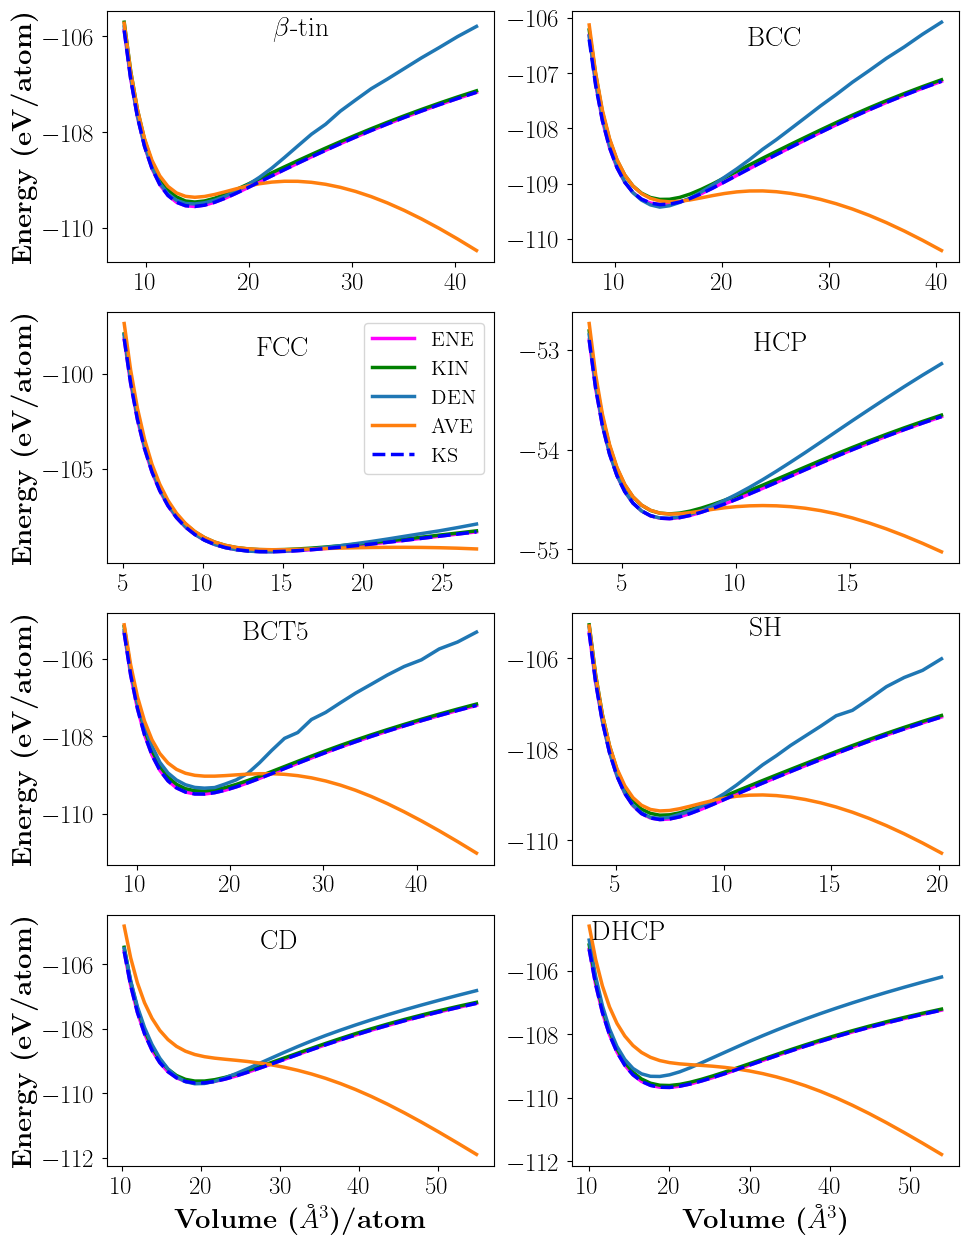

In [52]:
fig, axs = plt.subplots(4,2, figsize=(11,15))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Cwt_Btin_energy_te)*27.211407/4, linewidth=2.5, color='magenta', label=r'ENE')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Cwt_Btin_energy_ke)*27.211407/4, linewidth=2.5, color='green', label=r'KIN')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Cwt_Btin_energy_den)*27.211407/4, linewidth=2.5, label=r'DEN')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(E_WT_Btin)*27.211407/4, linewidth=2.5, label=r'AVE')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Ks_Btin_TE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue', label='KS')

im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_energy_te)*27.211407/2, linewidth=2.5, color='magenta', label=r'ENE')
im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_energy_ke)*27.211407/2, linewidth=2.5, color='green', label=r'KIN')
im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_energy_den)*27.211407/2, linewidth=2.5, label=r'DEN')
im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(E_WT_bcc)*27.211407/2, linewidth=2.5,label=r'AVE')
im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Ks_bcc_TE)*27.211407/4, linewidth=2.5, linestyle='dashed', color='blue', label='KS')

im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Cwt_fcc_energy_te)*27.211407/4, linewidth=2.5, color='magenta', label=r'ENE')
im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Cwt_fcc_energy_ke)*27.211407/4, linewidth=2.5, color='green', label=r'KIN')
im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Cwt_fcc_energy_den)*27.211407/4, linewidth=2.5, label=r'DEN')
im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(E_WT_fcc)*27.211407/4, linewidth=2.5,label=r'AVE')
im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Ks_fcc_TE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue', label='KS')

im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Cwt_hcp_energy_te)*27.211407/4, linewidth=2.5, color='magenta')
im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Cwt_hcp_energy_ke)*27.211407/4, linewidth=2.5, color='green')
im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Cwt_hcp_energy_den)*27.211407/4, linewidth=2.5)
im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(E_WT_hcp)*27.211407/4, linewidth=2.5)
im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Ks_hcp_TE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue')

im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Cwt_bct5_energy_te)*27.211407/4, linewidth=2.5, color='magenta')
im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Cwt_bct5_energy_ke)*27.211407/4, linewidth=2.5, color='green')
im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Cwt_bct5_energy_den)*27.211407/4, linewidth=2.5)
im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(E_WT_bct5)*27.211407/4, linewidth=2.5)
im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Ks_bct5_TE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue')


im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Cwt_sh_energy_te)*27.211407/1, linewidth=2.5, color='magenta')
im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Cwt_sh_energy_ke)*27.211407/1, linewidth=2.5, color='green')
im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Cwt_sh_energy_den)*27.211407/1, linewidth=2.5)
im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(E_WT_sh)*27.211407/1, linewidth=2.5)
im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Ks_sh_TE)*27.211407/2, linewidth=2.5, linestyle='dashed', color='blue')

im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_energy_te)*27.211407/8, linewidth=2.5, color='magenta')
im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_energy_ke)*27.211407/8, linewidth=2.5, color='green')
im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_energy_den)*27.211407/8, linewidth=2.5)
im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(E_WT_8cd)*27.211407/8, linewidth=2.5)
im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Ks_8cd_TE)*27.211407/16, linewidth=2.5, linestyle='dashed', color='blue')

im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/4,np.asarray(Cwt_dhcp_energy_te)*27.211407/4, linewidth=2.5, color='magenta')
im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/4,np.asarray(Cwt_dhcp_energy_ke)*27.211407/4, linewidth=2.5, color='green')
im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/4,np.asarray(Cwt_dhcp_energy_den)*27.211407/4, linewidth=2.5)
im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/4,np.asarray(E_WT_dhcp)*27.211407/4, linewidth=2.5)
im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/4,np.asarray(Ks_dhcp_TE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue')




# axs[0,0].set_title(r'$\beta$-tin', fontsize=18)
# axs[0,1].set_title(r'BCC', fontsize=18)
# axs[1,0].set_title(r'FCC', fontsize=18)
# axs[1,1].set_title(r'HCP', fontsize=18)
# axs[2,0].set_title(r'BCT5', fontsize=18)
# axs[2,1].set_title(r'SH', fontsize=18)
# axs[3,0].set_title(r'CD', fontsize=18)
# axs[3,1].set_title(r'DHCP', fontsize=18)

# axs[0,0].annotate(r'$\beta$-tin', xy=(2,1), xytext=(20,20))
# axs[0,1].annotate(r'BCC', xy=(2,1), xytext=(3, 1.5))
# axs[1,0].annotate(r'FCC', xy=(2,1), xytext=(3, 1.5))
# axs[1,1].annotate(r'HCP', xy=(2,1), xytext=(3, 1.5))
# axs[2,0].annotate(r'BCT5', xy=(2,1), xytext=(3, 1.5))
# axs[2,1].annotate(r'SH', xy=(2,1), xytext=(3, 1.5))
# axs[3,0].annotate(r'CD', xy=(2,1), xytext=(3, 1.5))
# axs[3,1].annotate(r'DHCP', xy=(2,1), xytext=(3, 1.5))
axs[0, 0].annotate(r'$\beta$-tin', xy=(25, -106), ha='center', fontsize=20)
axs[0, 1].annotate('BCC', xy=(25, -106.5), ha='center', fontsize=20)
axs[1, 0].annotate('FCC', xy=(15, -99), ha='center', fontsize=20)
axs[1, 1].annotate('HCP', xy=(12, -53), ha='center', fontsize=20)
axs[2, 0].annotate('BCT5', xy=(25, -105.5), ha='center', fontsize=20)
axs[2, 1].annotate('SH', xy=(12, -105.5), ha='center', fontsize=20)
axs[3, 0].annotate('CD', xy=(30,-105.5), ha='center', fontsize=20)
axs[3, 1].annotate('DHCP', xy=(15, -105), ha='center', fontsize=20)


axs[0,0].tick_params(axis='both', labelsize=18)
axs[0,1].tick_params(axis='both', labelsize=18)
axs[1,0].tick_params(axis='both', labelsize=18)
axs[1,1].tick_params(axis='both', labelsize=18)
axs[2,0].tick_params(axis='both', labelsize=18)
axs[2,1].tick_params(axis='both', labelsize=18)
axs[3,0].tick_params(axis='both', labelsize=18)
axs[3,1].tick_params(axis='both', labelsize=18)

axs[3,0].set_xlabel(r'\textbf{Volume ($\AA^{3}$)/atom}', fontsize=20)
axs[3,1].set_xlabel(r'\textbf{Volume ($\AA^{3}$)}', fontsize=20)
axs[0,0].set_ylabel(r'\textbf{Energy (eV/atom)}', fontsize=20)
axs[1,0].set_ylabel(r'\textbf{Energy (eV/atom)}', fontsize=20)
axs[3,0].set_ylabel(r'\textbf{Energy (eV/atom)}', fontsize=20)
axs[2,0].set_ylabel(r'\textbf{Energy (eV/atom)}', fontsize=20)

# axs[0, 0].set_ylim(-110,-109)
# axs[0, 1].set_ylim(-110,-109)
# axs[1, 0].set_ylim(-109.5,-109)
# axs[1, 1].set_ylim(-110,-109)
# axs[2, 0].set_ylim(-110,-109)
# axs[2, 1].set_ylim(-110,-109)
# axs[3, 0].set_ylim(-110,-109)
# axs[3, 1].set_ylim(-110,-109)
# axs[2,0].set_xlabel('Volume ($\AA^{3}$)')
# axs[2,0].set_ylabel('Energy (eV/atom)')
# axs[0].legend(['Real', 'Predicted'])
axs[1,0].legend(fontsize="15")
plt.savefig("EOS.png", bbox_inches='tight', dpi=200)#format="png", dpi=resolution_value)

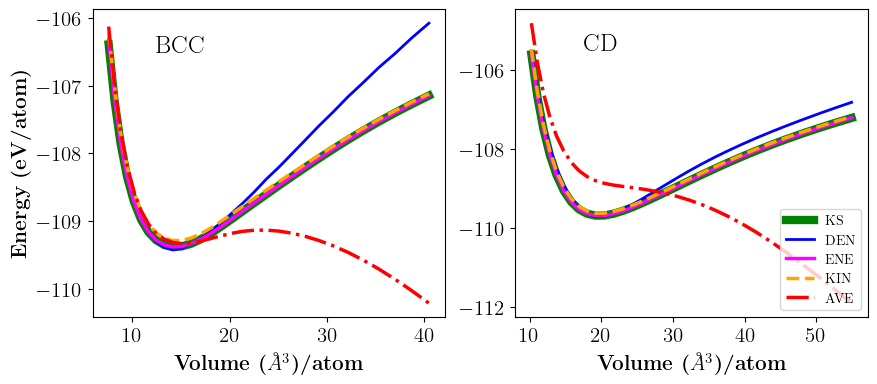

In [85]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')

im2 = axs[0].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Ks_bcc_TE)*27.211407/4, linewidth=6, color='green', label='KS')
im2 = axs[0].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_energy_den)*27.211407/2, linewidth=2, color='blue', label=r'DEN')
im2 = axs[0].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_energy_te)*27.211407/2, linewidth=2.5, color='magenta', label=r'ENE')
im2 = axs[0].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_energy_ke)*27.211407/2, '--', linewidth=2.5, color='orange', label=r'KIN')
im2 = axs[0].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(E_WT_bcc)*27.211407/2, '-.', linewidth=2.5,color='red', label=r'AVE')

im3 = axs[1].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Ks_8cd_TE)*27.211407/16, linewidth=6, color='green', label='KS')
im3 = axs[1].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_energy_den)*27.211407/8, linewidth=2, color='blue', label=r'DEN')
im3 = axs[1].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_energy_te)*27.211407/8, linewidth=2.5, color='magenta', label=r'ENE')
im3 = axs[1].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_energy_ke)*27.211407/8, '--', linewidth=2.5, color='orange', label=r'KIN')
im3 = axs[1].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(E_WT_8cd)*27.211407/8,'-.',  linewidth=2.5, color='red', label=r'AVE')


axs[0].annotate('BCC', xy=(15, -106.5), ha='center', fontsize=18)
axs[1].annotate('CD', xy=(20,-105.5), ha='center', fontsize=18)


axs[0].tick_params(axis='both', labelsize=15)
axs[1].tick_params(axis='both', labelsize=15)

axs[0].set_xlabel(r'\textbf{Volume ($\AA^{3}$)/atom}', fontsize=15)
axs[1].set_xlabel(r'\textbf{Volume ($\AA^{3}$)/atom}', fontsize=15)
axs[0].set_ylabel(r'\textbf{Energy (eV/atom)}', fontsize=15)


axs[1].legend(fontsize="10", loc='lower right')
plt.savefig("EOS.png", bbox_inches='tight', dpi=200)#format="png", dpi=resolution_value)

In [44]:
pwd

'/Users/valeria/Documents/aiWT/Final_version/wt/wt'

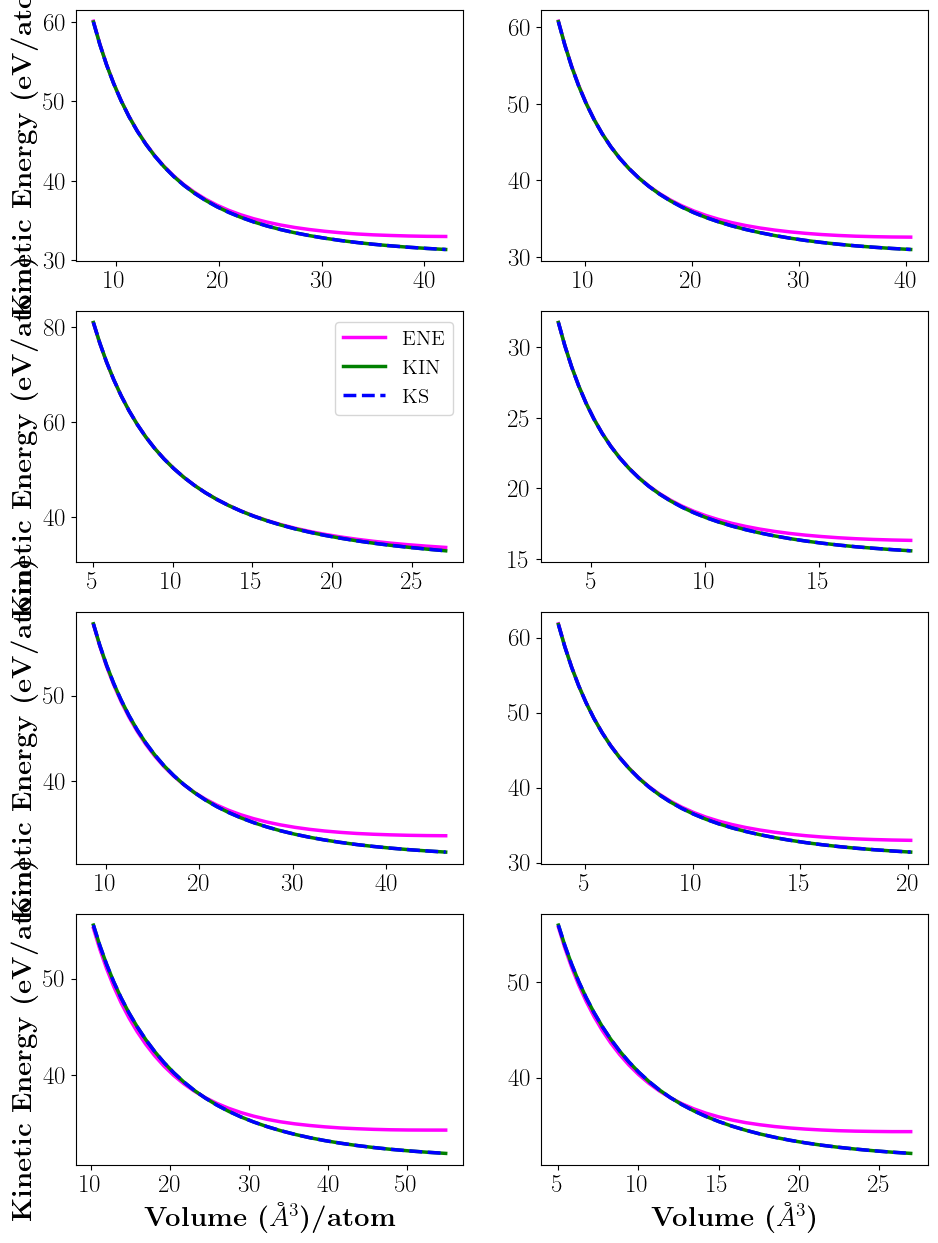

In [45]:
fig, axs = plt.subplots(4,2, figsize=(11,15))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', stretch='condensed')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Cwt_Btin_kin_te)*27.211407/4, linewidth=2.5, color='magenta', label=r'ENE')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Cwt_Btin_kin_ke)*27.211407/4, linewidth=2.5, color='green', label=r'KIN')
# im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Cwt_Btin_kin_den)*27.211407/4, linewidth=2.5, label=r'DEN')
# im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(KE_WT_Btin)*27.211407/4, linewidth=2.5, label=r'AVE')
im0 = axs[0,0].plot(np.asarray(V_Btin)*0.529177**3/4,np.asarray(Ks_Btin_KE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue', label='KS')

im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_kin_te)*27.211407/2, linewidth=2.5, color='magenta', label=r'ENE')
im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_kin_ke)*27.211407/2, linewidth=2.5, color='green', label=r'KIN')
# im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Cwt_bcc_kin_den)*27.211407/2, linewidth=2.5, label=r'DEN')
# im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(KE_WT_bcc)*27.211407/2, linewidth=2.5,label=r'AVE')
im2 = axs[0,1].plot(np.asarray(V_bcc)*0.529177**3/2,np.asarray(Ks_bcc_KE)*27.211407/4, linewidth=2.5, linestyle='dashed', color='blue', label='KS')

im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Cwt_fcc_kin_te)*27.211407/4, linewidth=2.5, color='magenta', label=r'ENE')
im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Cwt_fcc_kin_ke)*27.211407/4, linewidth=2.5, color='green', label=r'KIN')
# im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Cwt_fcc_kin_den)*27.211407/4, linewidth=2.5, label=r'DEN')
# im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(KE_WT_fcc)*27.211407/4, linewidth=2.5,label=r'AVE')
im1 = axs[1,0].plot(np.asarray(V_fcc)*0.529177**3/4,np.asarray(Ks_fcc_KE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue', label='KS')

im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Cwt_hcp_kin_te)*27.211407/4, linewidth=2.5, color='magenta')
im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Cwt_hcp_kin_ke)*27.211407/4, linewidth=2.5, color='green')
# im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Cwt_hcp_kin_den)*27.211407/4, linewidth=2.5)
# im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(KE_WT_hcp)*27.211407/4, linewidth=2.5)
im0 = axs[1,1].plot(np.asarray(V_hcp)*0.529177**3/4,np.asarray(Ks_hcp_KE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue')

im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Cwt_bct5_kin_te)*27.211407/4, linewidth=2.5, color='magenta')
im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Cwt_bct5_kin_ke)*27.211407/4, linewidth=2.5, color='green')
# im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Cwt_bct5_kin_den)*27.211407/4, linewidth=2.5)
# im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(KE_WT_bct5)*27.211407/4, linewidth=2.5)
im1 = axs[2,0].plot(np.asarray(V_bct5)*0.529177**3/4,np.asarray(Ks_bct5_KE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue')


im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Cwt_sh_kin_te)*27.211407/1, linewidth=2.5, color='magenta')
im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Cwt_sh_kin_ke)*27.211407/1, linewidth=2.5, color='green')
# im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Cwt_sh_kin_den)*27.211407/1, linewidth=2.5)
# im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(KE_WT_sh)*27.211407/1, linewidth=2.5)
im2 = axs[2,1].plot(np.asarray(V_sh)*0.529177**3/2,np.asarray(Ks_sh_KE)*27.211407/2, linewidth=2.5, linestyle='dashed', color='blue')

im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_kin_te)*27.211407/8, linewidth=2.5, color='magenta')
im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_kin_ke)*27.211407/8, linewidth=2.5, color='green')
# im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Cwt_8cd_kin_den)*27.211407/8, linewidth=2.5)
# im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(KE_WT_8cd)*27.211407/8, linewidth=2.5)
im3 = axs[3,0].plot(np.asarray(V_8cd)*0.529177**3/8,np.asarray(Ks_8cd_KE)*27.211407/16, linewidth=2.5, linestyle='dashed', color='blue')

im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(Cwt_dhcp_kin_te)*27.211407/4, linewidth=2.5, color='magenta')
im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(Cwt_dhcp_kin_ke)*27.211407/4, linewidth=2.5, color='green')
# im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(Cwt_dhcp_kin_den)*27.211407/4, linewidth=2.5)
# im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(KE_WT_dhcp)*27.211407/4, linewidth=2.5)
im3 = axs[3,1].plot(np.asarray(V_dhcp)*0.529177**3/8,np.asarray(Ks_dhcp_KE)*27.211407/8, linewidth=2.5, linestyle='dashed', color='blue')

axs[0, 0].annotate(r'$\beta$-tin', xy=(25, -106), ha='center', fontsize=20)
axs[0, 1].annotate('BCC', xy=(25, -106.5), ha='center', fontsize=20)
axs[1, 0].annotate('FCC', xy=(15, -99), ha='center', fontsize=20)
axs[1, 1].annotate('HCP', xy=(12, -53), ha='center', fontsize=20)
axs[2, 0].annotate('BCT5', xy=(25, -105.5), ha='center', fontsize=20)
axs[2, 1].annotate('SH', xy=(12, -105.5), ha='center', fontsize=20)
axs[3, 0].annotate('CD', xy=(30,-105.5), ha='center', fontsize=20)
axs[3, 1].annotate('DHCP', xy=(15, -105), ha='center', fontsize=20)


axs[0,0].tick_params(axis='both', labelsize=18)
axs[0,1].tick_params(axis='both', labelsize=18)
axs[1,0].tick_params(axis='both', labelsize=18)
axs[1,1].tick_params(axis='both', labelsize=18)
axs[2,0].tick_params(axis='both', labelsize=18)
axs[2,1].tick_params(axis='both', labelsize=18)
axs[3,0].tick_params(axis='both', labelsize=18)
axs[3,1].tick_params(axis='both', labelsize=18)

axs[3,0].set_xlabel(r'\textbf{Volume ($\AA^{3}$)/atom}', fontsize=20)
axs[3,1].set_xlabel(r'\textbf{Volume ($\AA^{3}$)}', fontsize=20)
axs[0,0].set_ylabel(r'\textbf{Kinetic Energy (eV/atom)}', fontsize=20)
axs[1,0].set_ylabel(r'\textbf{Kinetic Energy (eV/atom)}', fontsize=20)
axs[3,0].set_ylabel(r'\textbf{Kinetic Energy (eV/atom)}', fontsize=20)
axs[2,0].set_ylabel(r'\textbf{Kinetic Energy (eV/atom)}', fontsize=20)
# axs[2,0].set_xlabel('Volume ($\AA^{3}$)')
# axs[2,0].set_ylabel('Energy (eV/atom)')
# axs[0].legend(['Real', 'Predicted'])
axs[1,0].legend(fontsize="15")
plt.savefig("EOS.png", bbox_inches='tight', dpi=200)#format="png", dpi=resolution_value)

# RMSD of the total energy

In [46]:
import math
from sklearn.metrics import r2_score, mean_squared_error

#Total energy
y_ks_Btin = np.asarray(Ks_Btin_TE)*27.211407/8
y_cwt_Btin = np.asarray(Cwt_Btin_energy_te)*27.211407/4
R_aiwt_Btin_te =  mean_squared_error(y_ks_Btin, y_cwt_Btin) 
corr_aiwt_Btin_te = np.corrcoef(y_ks_Btin, y_cwt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_TE)*27.211407/8
y_cwt_fcc = np.asarray(Cwt_fcc_energy_te)*27.211407/4
R_aiwt_fcc_te =  mean_squared_error(y_ks_fcc, y_cwt_fcc) 
corr_aiwt_fcc_te = np.corrcoef(y_ks_fcc, y_cwt_fcc)

y_ks_bcc = np.asarray(Ks_bcc_TE)*27.211407/4
y_cwt_bcc = np.asarray(Cwt_bcc_energy_te)*27.211407/2
R_aiwt_bcc_te =  mean_squared_error(y_ks_bcc, y_cwt_bcc) 
corr_aiwt_bcc_te = np.corrcoef(y_ks_Btin, y_cwt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_TE)*27.211407/16
y_cwt_8cd = np.asarray(Cwt_8cd_energy_te)*27.211407/8
R_aiwt_8cd_te =  mean_squared_error(y_ks_8cd, y_cwt_8cd) 
corr_aiwt_8cd_te = np.corrcoef(y_ks_8cd, y_cwt_8cd)

y_ks_dhcp = np.asarray(Ks_dhcp_TE)*27.211407/8
y_cwt_dhcp = np.asarray(Cwt_dhcp_energy_te)*27.211407/4
R_aiwt_dhcp_te =  mean_squared_error(y_ks_dhcp, y_cwt_dhcp) 
corr_aiwt_dhcp_te = np.corrcoef(y_ks_dhcp, y_cwt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_TE)*27.211407/4
y_cwt_hcp = np.asarray(Cwt_hcp_energy_te)*27.211407/2
R_aiwt_hcp_te =  mean_squared_error(y_ks_hcp, y_cwt_hcp) 
corr_aiwt_hcp_te = np.corrcoef(y_ks_hcp, y_cwt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_TE)*27.211407/8
y_cwt_bct5 = np.asarray(Cwt_bct5_energy_te)*27.211407/4
R_aiwt_bct5_te =  mean_squared_error(y_ks_bct5, y_cwt_bct5) 
corr_aiwt_bct5_te = np.corrcoef(y_ks_bct5, y_cwt_bct5)

y_ks_sh = np.asarray(Ks_sh_TE)*27.211407/2
y_cwt_sh = np.asarray(Cwt_sh_energy_te)*27.211407/1
R_aiwt_sh_te =  mean_squared_error(y_ks_sh, y_cwt_sh) 
corr_aiwt_sh_te = np.corrcoef(y_ks_sh, y_cwt_sh)

#Kinetic energy
y_ks_Btin = np.asarray(Ks_Btin_TE)*27.211407/8
y_cwt_Btin = np.asarray(Cwt_Btin_energy_ke)*27.211407/4
R_aiwt_Btin_ke =  mean_squared_error(y_ks_Btin, y_cwt_Btin) 
corr_aiwt_Btin_ke = np.corrcoef(y_ks_Btin, y_cwt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_TE)*27.211407/8
y_cwt_fcc = np.asarray(Cwt_fcc_energy_ke)*27.211407/4
R_aiwt_fcc_ke =  mean_squared_error(y_ks_fcc, y_cwt_fcc) 
corr_aiwt_fcc_ke = np.corrcoef(y_ks_fcc, y_cwt_fcc)

y_ks_bcc = np.asarray(Ks_bcc_TE)*27.211407/4
y_cwt_bcc = np.asarray(Cwt_bcc_energy_ke)*27.211407/2
R_aiwt_bcc_ke =  mean_squared_error(y_ks_bcc, y_cwt_bcc) 
corr_aiwt_bcc_ke = np.corrcoef(y_ks_Btin, y_cwt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_TE)*27.211407/16
y_cwt_8cd = np.asarray(Cwt_8cd_energy_ke)*27.211407/8
R_aiwt_8cd_ke =  mean_squared_error(y_ks_8cd, y_cwt_8cd) 
corr_aiwt_8cd_ke = np.corrcoef(y_ks_8cd, y_cwt_8cd)

y_ks_dhcp = np.asarray(Ks_dhcp_TE)*27.211407/8
y_cwt_dhcp = np.asarray(Cwt_dhcp_energy_ke)*27.211407/4
R_aiwt_dhcp_ke =  mean_squared_error(y_ks_dhcp, y_cwt_dhcp) 
corr_aiwt_dhcp_ke = np.corrcoef(y_ks_dhcp, y_cwt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_TE)*27.211407/4
y_cwt_hcp = np.asarray(Cwt_hcp_energy_ke)*27.211407/2
R_aiwt_hcp_ke =  mean_squared_error(y_ks_hcp, y_cwt_hcp) 
corr_aiwt_hcp_ke = np.corrcoef(y_ks_hcp, y_cwt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_TE)*27.211407/8
y_cwt_bct5 = np.asarray(Cwt_bct5_energy_ke)*27.211407/4
R_aiwt_bct5_ke =  mean_squared_error(y_ks_bct5, y_cwt_bct5) 
corr_aiwt_bct5_ke = np.corrcoef(y_ks_bct5, y_cwt_bct5)

y_ks_sh = np.asarray(Ks_sh_TE)*27.211407/2
y_cwt_sh = np.asarray(Cwt_sh_energy_ke)*27.211407/1
R_aiwt_sh_ke =  mean_squared_error(y_ks_sh, y_cwt_sh) 
corr_aiwt_sh_ke = np.corrcoef(y_ks_sh, y_cwt_sh)

#Density
y_ks_dhcp = np.asarray(Ks_dhcp_TE)*27.211407/8
y_cwt_dhcp = np.asarray(Cwt_dhcp_energy_den)*27.211407/4
R_aiwt_dhcp_den =  mean_squared_error(y_ks_dhcp, y_cwt_dhcp) 
corr_aiwt_dhcp_den = np.corrcoef(y_ks_dhcp, y_cwt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_TE)*27.211407/4
y_cwt_hcp = np.asarray(Cwt_hcp_energy_den)*27.211407/2
R_aiwt_hcp_den =  mean_squared_error(y_ks_hcp, y_cwt_hcp) 
corr_aiwt_hcp_den = np.corrcoef(y_ks_hcp, y_cwt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_TE)*27.211407/8
y_cwt_bct5 = np.asarray(Cwt_bct5_energy_den)*27.211407/4
R_aiwt_bct5_den =  mean_squared_error(y_ks_bct5, y_cwt_bct5) 
corr_aiwt_bct5_den = np.corrcoef(y_ks_bct5, y_cwt_bct5)

y_ks_sh = np.asarray(Ks_sh_TE)*27.211407/2
y_cwt_sh = np.asarray(Cwt_sh_energy_den)*27.211407/1
R_aiwt_sh_den =  mean_squared_error(y_ks_sh, y_cwt_sh) 
corr_aiwt_sh_den = np.corrcoef(y_ks_sh, y_cwt_sh)

y_ks_bcc = np.asarray(Ks_bcc_TE)*27.211407/4
y_cwt_bcc = np.asarray(Cwt_bcc_energy_den)*27.211407/2
R_aiwt_bcc_den =  mean_squared_error(y_ks_bcc, y_cwt_bcc) 
corr_wt_bcc_den = np.corrcoef(y_ks_Btin, y_cwt_bcc)

y_ks_fcc = np.asarray(Ks_fcc_TE)*27.211407/8
y_cwt_fcc = np.asarray(Cwt_fcc_energy_den)*27.211407/4
R_aiwt_fcc_den =  mean_squared_error(y_ks_fcc, y_cwt_fcc) 
corr_wt_fcc_den = np.corrcoef(y_ks_fcc, y_cwt_fcc)

y_ks_8cd = np.asarray(Ks_8cd_TE)*27.211407/16
y_cwt_8cd = np.asarray(Cwt_8cd_energy_den)*27.211407/8
R_aiwt_8cd_den =  mean_squared_error(y_ks_8cd, y_cwt_8cd) 
corr_wt_8cd_den = np.corrcoef(y_ks_8cd, y_cwt_8cd)

y_ks_Btin = np.asarray(Ks_Btin_TE)*27.211407/8
y_cwt_Btin = np.asarray(Cwt_Btin_energy_den)*27.211407/4
R_aiwt_Btin_den =  mean_squared_error(y_ks_Btin, y_cwt_Btin) 
corr_wt_Btin_den = np.corrcoef(y_ks_Btin, y_cwt_Btin)

y_ks_Btin = np.asarray(Ks_Btin_TE)*27.211407/8
y_wt_Btin = np.asarray(E_WT_Btin)*27.211407/4
R_wt_Btin_den =  mean_squared_error(y_ks_Btin, y_wt_Btin) 
corr_wt_Btin_den = np.corrcoef(y_ks_Btin, y_wt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_TE)*27.211407/8
y_wt_fcc = np.asarray(E_WT_fcc)*27.211407/4
R_wt_fcc_den =  mean_squared_error(y_ks_fcc, y_wt_fcc) 
corr_wt_fcc_den = np.corrcoef(y_ks_fcc, y_wt_fcc)



y_ks_bcc = np.asarray(Ks_bcc_TE)*27.211407/4
y_wt_bcc = np.asarray(E_WT_bcc)*27.211407/2
R_wt_bcc_den =  mean_squared_error(y_ks_bcc, y_wt_bcc) 
corr_wt_bcc_den = np.corrcoef(y_ks_Btin, y_wt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_TE)*27.211407/16
y_wt_8cd = np.asarray(E_WT_8cd)*27.211407/8
R_wt_8cd_den =  mean_squared_error(y_ks_8cd, y_wt_8cd) 
corr_wt_8cd_den = np.corrcoef(y_ks_8cd, y_wt_8cd)

y_ks_dhcp = np.asarray(Ks_dhcp_TE)*27.211407/8
y_wt_dhcp = np.asarray(E_WT_dhcp)*27.211407/4
R_wt_dhcp_den =  mean_squared_error(y_ks_dhcp, y_wt_dhcp) 
corr_wt_dhcp_den = np.corrcoef(y_ks_dhcp, y_wt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_TE)*27.211407/4
y_wt_hcp = np.asarray(E_WT_hcp)*27.211407/2
R_wt_hcp_den =  mean_squared_error(y_ks_hcp, y_wt_hcp) 
corr_wt_hcp_den = np.corrcoef(y_ks_hcp, y_wt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_TE)*27.211407/8
y_wt_bct5 = np.asarray(E_WT_bct5)*27.211407/4
R_wt_bct5_den =  mean_squared_error(y_ks_bct5, y_wt_bct5) 
corr_wt_bct5_den = np.corrcoef(y_ks_bct5, y_wt_bct5)

y_ks_sh = np.asarray(Ks_sh_TE)*27.211407/2
y_wt_sh = np.asarray(E_WT_sh)*27.211407/1
R_wt_sh_den =  mean_squared_error(y_ks_sh, y_wt_sh) 
corr_wt_sh_den = np.corrcoef(y_ks_sh, y_wt_sh)

In [47]:
from tabulate import tabulate
## Energies wrt KS bcc energies
data = [
    ["Btin",R_aiwt_Btin_ke, R_aiwt_Btin_te, R_aiwt_Btin_den, R_wt_Btin_den],
    ["bcc", R_aiwt_bcc_ke, R_aiwt_bcc_te, R_aiwt_bcc_den, R_wt_bcc_den],
    ["fcc", R_aiwt_fcc_ke, R_aiwt_fcc_te, R_aiwt_fcc_den, R_wt_fcc_den],
    ["hcp", R_aiwt_hcp_ke, R_aiwt_hcp_te, R_aiwt_hcp_den, R_wt_hcp_den],
    ["bct5", R_aiwt_bct5_ke, R_aiwt_bct5_te, R_aiwt_bct5_den, R_wt_bct5_den],
    ["sh", R_aiwt_sh_ke, R_aiwt_sh_te, R_aiwt_sh_den, R_wt_sh_den],
    ["cd", R_aiwt_8cd_ke, R_aiwt_8cd_te, R_aiwt_8cd_den, R_wt_8cd_den],
    ["dhcp", R_aiwt_dhcp_ke, R_aiwt_dhcp_te, R_aiwt_dhcp_den, R_wt_dhcp_den],

]

table = tabulate(data, headers=["Total energy","RMSE rho0_KIN","RMSE rho0_TE","RMSE rho0_DEN", "RMSE N/V"], tablefmt="grid")
print(tabulate(data, tablefmt="latex"))
print(table)

\begin{tabular}{lrrrr}
\hline
 Btin & 0.0078538  & 1.45526e-07 & 0.356397  & 1.43281  \\
 bcc  & 0.00880481 & 0.000211117 & 0.180017  & 1.35568  \\
 fcc  & 0.01834    & 7.97136e-09 & 0.0229598 & 0.150755 \\
 hcp  & 0.0097169  & 3.15121e-06 & 0.163834  & 0.986523 \\
 bct5 & 0.00637558 & 4.15578e-13 & 0.847364  & 1.92523  \\
 sh   & 0.00839885 & 2.00263e-09 & 0.31481   & 1.13085  \\
 cd   & 0.00442326 & 2.18109e-06 & 0.0518734 & 3.32111  \\
 dhcp & 0.004603   & 2.48851e-06 & 0.446337  & 3.02704  \\
\hline
\end{tabular}
+----------------+-----------------+----------------+-----------------+------------+
| Total energy   |   RMSE rho0_KIN |   RMSE rho0_TE |   RMSE rho0_DEN |   RMSE N/V |
+================+=================+================+=================+============+
| Btin           |      0.0078538  |    1.45526e-07 |       0.356397  |   1.43281  |
+----------------+-----------------+----------------+-----------------+------------+
| bcc            |      0.00880481 |    0.000211117 

# RMSD of the Kinetic energy

In [49]:
import math
from sklearn.metrics import r2_score, mean_squared_error
# Kinetic energy RMSD
# rho0 from Total energy
y_ks_Btin = np.asarray(Ks_Btin_KE)*27.211407/8
y_cwt_Btin = np.asarray(Cwt_Btin_kin_te)*27.211407/4
R_aiwt_Btin_te =  mean_squared_error(y_ks_Btin, y_cwt_Btin) 
corr_aiwt_Btin_te = np.corrcoef(y_ks_Btin, y_cwt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_KE)*27.211407/8
y_cwt_fcc = np.asarray(Cwt_fcc_kin_te)*27.211407/4
R_aiwt_fcc_te =  mean_squared_error(y_ks_fcc, y_cwt_fcc) 
corr_aiwt_fcc_te = np.corrcoef(y_ks_fcc, y_cwt_fcc)

y_ks_bcc = np.asarray(Ks_bcc_KE)*27.211407/4
y_cwt_bcc = np.asarray(Cwt_bcc_kin_te)*27.211407/2
R_aiwt_bcc_te =  mean_squared_error(y_ks_bcc, y_cwt_bcc) 
corr_aiwt_bcc_te = np.corrcoef(y_ks_Btin, y_cwt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_KE)*27.211407/16
y_cwt_8cd = np.asarray(Cwt_8cd_kin_te)*27.211407/8
R_aiwt_8cd_te =  mean_squared_error(y_ks_8cd, y_cwt_8cd) 
corr_aiwt_8cd_te = np.corrcoef(y_ks_8cd, y_cwt_8cd)

y_ks_dhcp = np.asarray(Ks_dhcp_KE)*27.211407/8
y_cwt_dhcp = np.asarray(Cwt_dhcp_kin_te)*27.211407/4
R_aiwt_dhcp_te =  mean_squared_error(y_ks_dhcp, y_cwt_dhcp) 
corr_aiwt_dhcp_te = np.corrcoef(y_ks_dhcp, y_cwt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_KE)*27.211407/4
y_cwt_hcp = np.asarray(Cwt_hcp_kin_te)*27.211407/2
R_aiwt_hcp_te =  mean_squared_error(y_ks_hcp, y_cwt_hcp) 
corr_aiwt_hcp_te = np.corrcoef(y_ks_hcp, y_cwt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_KE)*27.211407/8
y_cwt_bct5 = np.asarray(Cwt_bct5_kin_te)*27.211407/4
R_aiwt_bct5_te =  mean_squared_error(y_ks_bct5, y_cwt_bct5) 
corr_aiwt_bct5_te = np.corrcoef(y_ks_bct5, y_cwt_bct5)

y_ks_sh = np.asarray(Ks_sh_KE)*27.211407/2
y_cwt_sh = np.asarray(Cwt_sh_kin_te)*27.211407/1
R_aiwt_sh_te =  mean_squared_error(y_ks_sh, y_cwt_sh) 
corr_aiwt_sh_te = np.corrcoef(y_ks_sh, y_cwt_sh)

# rho0 from kinetic energy
y_ks_Btin = np.asarray(Ks_Btin_KE)*27.211407/8
y_cwt_Btin = np.asarray(Cwt_Btin_kin_ke)*27.211407/4
R_aiwt_Btin_ke =  mean_squared_error(y_ks_Btin, y_cwt_Btin) 
corr_aiwt_Btin_ke = np.corrcoef(y_ks_Btin, y_cwt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_KE)*27.211407/8
y_cwt_fcc = np.asarray(Cwt_fcc_kin_ke)*27.211407/4
R_aiwt_fcc_ke =  mean_squared_error(y_ks_fcc, y_cwt_fcc) 
corr_aiwt_fcc_ke = np.corrcoef(y_ks_fcc, y_cwt_fcc)

y_ks_bcc = np.asarray(Ks_bcc_KE)*27.211407/4
y_cwt_bcc = np.asarray(Cwt_bcc_kin_ke)*27.211407/2
R_aiwt_bcc_ke =  mean_squared_error(y_ks_bcc, y_cwt_bcc) 
corr_aiwt_bcc_ke = np.corrcoef(y_ks_Btin, y_cwt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_KE)*27.211407/16
y_cwt_8cd = np.asarray(Cwt_8cd_kin_ke)*27.211407/8
R_aiwt_8cd_ke =  mean_squared_error(y_ks_8cd, y_cwt_8cd) 
corr_aiwt_8cd_ke = np.corrcoef(y_ks_8cd, y_cwt_8cd)

y_ks_dhcp = np.asarray(Ks_dhcp_KE)*27.211407/8
y_cwt_dhcp = np.asarray(Cwt_dhcp_kin_ke)*27.211407/4
R_aiwt_dhcp_ke =  mean_squared_error(y_ks_dhcp, y_cwt_dhcp) 
corr_aiwt_dhcp_ke = np.corrcoef(y_ks_dhcp, y_cwt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_KE)*27.211407/4
y_cwt_hcp = np.asarray(Cwt_hcp_kin_ke)*27.211407/2
R_aiwt_hcp_ke =  mean_squared_error(y_ks_hcp, y_cwt_hcp) 
corr_aiwt_hcp_ke = np.corrcoef(y_ks_hcp, y_cwt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_KE)*27.211407/8
y_cwt_bct5 = np.asarray(Cwt_bct5_kin_ke)*27.211407/4
R_aiwt_bct5_ke =  mean_squared_error(y_ks_bct5, y_cwt_bct5) 
corr_aiwt_bct5_ke = np.corrcoef(y_ks_bct5, y_cwt_bct5)

y_ks_sh = np.asarray(Ks_sh_KE)*27.211407/2
y_cwt_sh = np.asarray(Cwt_sh_kin_ke)*27.211407/1
R_aiwt_sh_ke =  mean_squared_error(y_ks_sh, y_cwt_sh) 
corr_aiwt_sh_ke = np.corrcoef(y_ks_sh, y_cwt_sh)

#rho0 from Density
y_ks_dhcp = np.asarray(Ks_dhcp_KE)*27.211407/8
y_cwt_dhcp = np.asarray(Cwt_dhcp_kin_den)*27.211407/4
R_aiwt_dhcp_den =  mean_squared_error(y_ks_dhcp, y_cwt_dhcp) 
corr_aiwt_dhcp_den = np.corrcoef(y_ks_dhcp, y_cwt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_KE)*27.211407/4
y_cwt_hcp = np.asarray(Cwt_hcp_kin_den)*27.211407/2
R_aiwt_hcp_den =  mean_squared_error(y_ks_hcp, y_cwt_hcp) 
corr_aiwt_hcp_den = np.corrcoef(y_ks_hcp, y_cwt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_KE)*27.211407/8
y_cwt_bct5 = np.asarray(Cwt_bct5_kin_den)*27.211407/4
R_aiwt_bct5_den =  mean_squared_error(y_ks_bct5, y_cwt_bct5) 
corr_aiwt_bct5_den = np.corrcoef(y_ks_bct5, y_cwt_bct5)

y_ks_sh = np.asarray(Ks_sh_KE)*27.211407/2
y_cwt_sh = np.asarray(Cwt_sh_kin_den)*27.211407/1
R_aiwt_sh_den =  mean_squared_error(y_ks_sh, y_cwt_sh) 
corr_aiwt_sh_den = np.corrcoef(y_ks_sh, y_cwt_sh)

y_ks_Btin = np.asarray(Ks_Btin_KE)*27.211407/8
y_wt_Btin = np.asarray(KE_WT_Btin)*27.211407/4
R_wt_Btin_den =  mean_squared_error(y_ks_Btin, y_wt_Btin) 
corr_wt_Btin_den = np.corrcoef(y_ks_Btin, y_wt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_KE)*27.211407/8
y_wt_fcc = np.asarray(KE_WT_fcc)*27.211407/4
R_wt_fcc_den =  mean_squared_error(y_ks_fcc, y_wt_fcc) 
corr_wt_fcc_den = np.corrcoef(y_ks_fcc, y_wt_fcc)

y_ks_bcc = np.asarray(Ks_bcc_KE)*27.211407/4
y_wt_bcc = np.asarray(KE_WT_bcc)*27.211407/2
R_wt_bcc_den =  mean_squared_error(y_ks_bcc, y_wt_bcc) 
corr_wt_bcc_den = np.corrcoef(y_ks_Btin, y_wt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_KE)*27.211407/16
y_wt_8cd = np.asarray(KE_WT_8cd)*27.211407/8
R_wt_8cd_den =  mean_squared_error(y_ks_8cd, y_wt_8cd) 
corr_wt_8cd_den = np.corrcoef(y_ks_8cd, y_wt_8cd)

y_ks_dhcp = np.asarray(Ks_dhcp_KE)*27.211407/8
y_wt_dhcp = np.asarray(KE_WT_dhcp)*27.211407/4
R_wt_dhcp_den =  mean_squared_error(y_ks_dhcp, y_wt_dhcp) 
corr_wt_dhcp_den = np.corrcoef(y_ks_dhcp, y_wt_dhcp)

y_ks_hcp = np.asarray(Ks_hcp_KE)*27.211407/4
y_wt_hcp = np.asarray(KE_WT_hcp)*27.211407/2
R_wt_hcp_den =  mean_squared_error(y_ks_hcp, y_wt_hcp) 
corr_wt_hcp_den = np.corrcoef(y_ks_hcp, y_wt_hcp)

y_ks_bct5 = np.asarray(Ks_bct5_KE)*27.211407/8
y_wt_bct5 = np.asarray(KE_WT_bct5)*27.211407/4
R_wt_bct5_den =  mean_squared_error(y_ks_bct5, y_wt_bct5) 
corr_wt_bct5_den = np.corrcoef(y_ks_bct5, y_wt_bct5)

y_ks_sh = np.asarray(Ks_sh_KE)*27.211407/2
y_wt_sh = np.asarray(KE_WT_sh)*27.211407/1
R_wt_sh_den =  mean_squared_error(y_ks_sh, y_wt_sh) 
corr_wt_sh_den = np.corrcoef(y_ks_sh, y_wt_sh)

y_ks_Btin = np.asarray(Ks_Btin_KE)*27.211407/8
y_cwt_Btin = np.asarray(Cwt_Btin_kin_den)*27.211407/4
R_aiwt_Btin_den =  mean_squared_error(y_ks_Btin, y_cwt_Btin) 
corr_aiwt_Btin_den = np.corrcoef(y_ks_Btin, y_cwt_Btin)

y_ks_fcc = np.asarray(Ks_fcc_KE)*27.211407/8
y_cwt_fcc = np.asarray(Cwt_fcc_kin_den)*27.211407/4
R_aiwt_fcc_den =  mean_squared_error(y_ks_fcc, y_cwt_fcc) 
corr_aiwt_fcc_den = np.corrcoef(y_ks_fcc, y_cwt_fcc)

y_ks_bcc = np.asarray(Ks_bcc_KE)*27.211407/4
y_cwt_bcc = np.asarray(Cwt_bcc_kin_den)*27.211407/2
R_aiwt_bcc_den =  mean_squared_error(y_ks_bcc, y_cwt_bcc) 
corr_aiwt_bcc_den = np.corrcoef(y_ks_Btin, y_cwt_bcc)

y_ks_8cd = np.asarray(Ks_8cd_KE)*27.211407/16
y_cwt_8cd = np.asarray(Cwt_8cd_kin_den)*27.211407/8
R_aiwt_8cd_den =  mean_squared_error(y_ks_8cd, y_cwt_8cd) 
corr_aiwt_8cd_den = np.corrcoef(y_ks_8cd, y_cwt_8cd)

In [50]:
from tabulate import tabulate
## Energies wrt KS bcc energies
data = [
    ["Btin",R_aiwt_Btin_ke, R_aiwt_Btin_te, R_aiwt_Btin_den, R_wt_Btin_den],
    ["bcc", R_aiwt_bcc_ke,  R_aiwt_bcc_te,  R_aiwt_bcc_den,  R_wt_bcc_den],
    ["fcc", R_aiwt_fcc_ke,  R_aiwt_fcc_te,  R_aiwt_fcc_den,  R_wt_fcc_den],
    ["hcp", R_aiwt_hcp_ke,  R_aiwt_hcp_te,  R_aiwt_hcp_den,  R_wt_hcp_den],
    ["bct5", R_aiwt_bct5_ke,R_aiwt_bct5_te, R_aiwt_bct5_den, R_wt_bct5_den],
    ["sh", R_aiwt_sh_ke,    R_aiwt_sh_te,   R_aiwt_sh_den,   R_wt_sh_den],
    ["cd", R_aiwt_8cd_ke,   R_aiwt_8cd_te,  R_aiwt_8cd_den,  R_wt_8cd_den],
    ["dhcp", R_aiwt_dhcp_ke,R_aiwt_dhcp_te, R_aiwt_dhcp_den, R_wt_dhcp_den],
]

table = tabulate(data, headers=["Kinetic energy","RMSE rho0_KIN","RMSE rho0_TE","RMSE rho0_DEN", "RMSE N\V"], tablefmt="grid")
print(tabulate(data, tablefmt="latex"))

print(table)

\begin{tabular}{lrrrr}
\hline
 Btin & 3.29724e-06 & 0.501437  & 0.111932  & 1.57739  \\
 bcc  & 5.11932e-05 & 0.461916  & 0.149925  & 1.65858  \\
 fcc  & 5.32459e-08 & 0.0613011 & 0.0169679 & 0.225314 \\
 hcp  & 1.69276e-05 & 0.379019  & 0.106427  & 1.40339  \\
 bct5 & 2.12079e-16 & 0.709012  & 0.144814  & 1.698    \\
 sh   & 3.3871e-06  & 0.451     & 0.0953697 & 1.42585  \\
 cd   & 4.2684e-16  & 1.2604    & 1.11091   & 2.0057   \\
 dhcp & 2.81462e-16 & 1.06297   & 0.681532  & 1.77589  \\
\hline
\end{tabular}
+------------------+-----------------+----------------+-----------------+------------+
| Kinetic energy   |   RMSE rho0_KIN |   RMSE rho0_TE |   RMSE rho0_DEN |   RMSE N\V |
+==================+=================+================+=================+============+
| Btin             |     3.29724e-06 |      0.501437  |       0.111932  |   1.57739  |
+------------------+-----------------+----------------+-----------------+------------+
| bcc              |     5.11932e-05 |      0.4619